# Import Library


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler



# Modeling
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score, accuracy_score, precision_score, recall_score,make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


# Model Saving
import pickle
import warnings

warnings.filterwarnings('ignore')




# Data Loading

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [3]:
column = ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Based on this info, some column will be droped. Columns that will be droped are :
- Id : its too unique columns
- member id : its too unique columns
- Unnamed : This column just indicate the index of row
- desc : Missing value on this columns is too much so its must be droped
- mths_since_last_delinq : Missing value on this columns is too much so its must be droped
- mths_since_last_record : Missing value on this columns is too much so its must be droped 
- next_pymnt_d : Missing value on this columns is too much so its must be droped
- mths_since_last_major_derog : Missing value on this columns is too much so its must be droped
- annual_inc_joint : Missing value on this columns is too much so its must be droped
- dti_joint : Missing value on this columns is too much so its must be droped
- verification_status_joint : Missing value on this columns is too much so its must be droped
- tot_coll_amt : Missing value on this columns is too much so its must be droped
- tot_cur_bal : Missing value on this columns is too much so its must be droped
- open_acc_6m : Missing value on this columns is too much so its must be droped
- open_il_6m : Missing value on this columns is too much so its must be droped
- open_il_12m : Missing value on this columns is too much so its must be droped
- open_il_24m : Missing value on this columns is too much so its must be droped
- mths_since_rcnt_il : Missing value on this columns is too much so its must be droped
- total_bal_il : Missing value on this columns is too much so its must be droped
- il_util : Missing value on this columns is too much so its must be droped
- open_rv_12m : Missing value on this columns is too much so its must be droped
- open_rv_24m : Missing value on this columns is too much so its must be droped
- max_bal_bc : Missing value on this columns is too much so its must be droped
- all_util : Missing value on this columns is too much so its must be droped
- total_rev_hi_lim : Missing value on this columns is too much so its must be droped
- inq_fi : Missing value on this columns is too much so its must be droped
- total_cu_tl : Missing value on this columns is too much so its must be droped 
- inq_last_12m : Missing value on this columns is too much so its must be droped 


In [5]:
droped_column= ['Unnamed: 0','id', 'member_id' ,'desc', 'mths_since_last_delinq', 'mths_since_last_record',  'next_pymnt_d', 'mths_since_last_major_derog', 
'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 
'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 
'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',  'inq_last_12m' ]


In [6]:
df = df.drop(droped_column, axis=1)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,...,0.00,0.00,0.00,Jan-16,432.64,Jan-16,0.0,1,INDIVIDUAL,0.0
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,...,0.00,0.00,0.00,Dec-14,17.50,Jan-16,0.0,1,INDIVIDUAL,0.0
466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,...,0.00,0.00,0.00,Jan-16,514.34,Dec-15,0.0,1,INDIVIDUAL,0.0
466283,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,...,0.00,0.00,0.00,Dec-14,1500.68,Apr-15,0.0,1,INDIVIDUAL,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_title                   438697 non-null  object 
 9   emp_length                  445277 non-null  object 
 10  home_ownership              466285 non-null  object 
 11  annual_inc                  466281 non-null  float64
 12  verification_status         466285 non-null  object 
 13  issue_d       

Some missing value will be droped without droped its columns. That can be done cause of the sum of missing value on thats columns is not too much and can be ignored

In [8]:
df_fix = df.dropna()
df_fix = df_fix.reset_index(drop=True)
df_fix

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0
2,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0
3,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,0.00,0.00,Jan-15,161.03,Sep-15,0.0,1,INDIVIDUAL,0.0
4,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,0.00,0.00,0.00,Jan-16,170.08,Jan-16,0.0,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437704,15000,15000,15000.0,36 months,13.53,509.25,B,B5,Director of Operations,4 years,...,0.00,0.00,0.00,Jan-16,509.25,Jan-16,0.0,1,INDIVIDUAL,0.0
437705,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,...,0.00,0.00,0.00,Jan-16,432.64,Jan-16,0.0,1,INDIVIDUAL,0.0
437706,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,...,0.00,0.00,0.00,Dec-14,17.50,Jan-16,0.0,1,INDIVIDUAL,0.0
437707,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,...,0.00,0.00,0.00,Jan-16,514.34,Dec-15,0.0,1,INDIVIDUAL,0.0


In [9]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437709 entries, 0 to 437708
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   437709 non-null  int64  
 1   funded_amnt                 437709 non-null  int64  
 2   funded_amnt_inv             437709 non-null  float64
 3   term                        437709 non-null  object 
 4   int_rate                    437709 non-null  float64
 5   installment                 437709 non-null  float64
 6   grade                       437709 non-null  object 
 7   sub_grade                   437709 non-null  object 
 8   emp_title                   437709 non-null  object 
 9   emp_length                  437709 non-null  object 
 10  home_ownership              437709 non-null  object 
 11  annual_inc                  437709 non-null  float64
 12  verification_status         437709 non-null  object 
 13  issue_d       

In [10]:
df_fix.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq'],
      dtype='object')

In [11]:
columns = [ 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq']

In [49]:
cardinal = []
for i in columns:
    nunique = df[i].nunique()
    type = df[i].dtypes
    print(i, nunique,type)

    if type == 'object' and nunique > 10 or nunique ==1 :
        cardinal.append(i)



cardinal

loan_amnt 1352 int64
funded_amnt 1354 int64
funded_amnt_inv 9854 float64
term 2 object
int_rate 506 float64
installment 55622 float64
grade 7 object
sub_grade 35 object
emp_title 205475 object
emp_length 11 object
home_ownership 6 object
annual_inc 31901 float64
verification_status 3 object
issue_d 91 object
loan_status 9 object
pymnt_plan 2 object
url 466285 object
purpose 14 object
title 63098 object
zip_code 888 object
addr_state 50 object
dti 3997 float64
delinq_2yrs 24 float64
earliest_cr_line 664 object
inq_last_6mths 28 float64
open_acc 62 float64
pub_rec 26 float64
revol_bal 58142 int64
revol_util 1269 float64
total_acc 112 float64
initial_list_status 2 object
out_prncp 135665 float64
out_prncp_inv 141189 float64
total_pymnt 351609 float64
total_pymnt_inv 347659 float64
total_rec_prncp 172713 float64
total_rec_int 270249 float64
total_rec_late_fee 5808 float64
recoveries 22773 float64
collection_recovery_fee 20275 float64
last_pymnt_d 98 object
last_pymnt_amnt 198194 float64
la

['sub_grade',
 'emp_title',
 'emp_length',
 'issue_d',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d',
 'policy_code',
 'application_type']

Based on cardinality checking, some column will be dropped causes by its cardinality. The columns that will be droped are : 
- 'sub_grade'
- 'emp_title'
- 'emp_length'
- 'issue_d'
- 'url'
- 'purpose'
- 'title'
- 'zip_code'
- 'addr_state'
- 'earliest_cr_line'
- 'last_pymnt_d'
- 'last_credit_pull_d'
- 'application_type'

In [50]:
df_final = df_fix.drop(cardinal, axis=1)
df_final = df_final.reset_index(drop=True)
df_final

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq
0,2500,2500,2500.0,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0
1,10000,10000,10000.0,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0
2,3000,3000,3000.0,60 months,12.69,67.79,B,RENT,80000.0,Source Verified,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0
3,5000,5000,5000.0,36 months,7.90,156.46,A,RENT,36000.0,Source Verified,...,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,0.0
4,7000,7000,7000.0,60 months,15.96,170.08,C,RENT,47004.0,Not Verified,...,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,170.08,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437704,15000,15000,15000.0,36 months,13.53,509.25,B,RENT,66000.0,Source Verified,...,12222.000000,12222.00,9314.37,2907.63,0.00,0.00,0.00,509.25,0.0,0.0
437705,18400,18400,18400.0,60 months,14.47,432.64,C,MORTGAGE,110000.0,Source Verified,...,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64,0.0,0.0
437706,22000,22000,22000.0,60 months,19.97,582.50,D,MORTGAGE,78000.0,Verified,...,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50,0.0,0.0
437707,20700,20700,20700.0,60 months,16.99,514.34,D,MORTGAGE,46000.0,Verified,...,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34,0.0,0.0


In [51]:
df_final['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [52]:
def loan_status_risk(loan_status):
    if pd.isna(loan_status):
        pass
    elif loan_status in ['Fully Paid']:
        return 'Low Risk'
    elif loan_status in ['Current','In Grace Period']:
        return 'Medium Risk'
    else :
        return 'High Risk'

In [53]:
df_final['loan_risk'] = df_final['loan_status'].apply(loan_status_risk)
df_final['loan_risk']

0           High Risk
1            Low Risk
2         Medium Risk
3            Low Risk
4         Medium Risk
             ...     
437704    Medium Risk
437705    Medium Risk
437706      High Risk
437707    Medium Risk
437708       Low Risk
Name: loan_risk, Length: 437709, dtype: object

In [54]:
df_final = df_final.drop(['loan_status'],axis=1)
df_final

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,loan_risk
0,2500,2500,2500.0,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,High Risk
1,10000,10000,10000.0,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,Low Risk
2,3000,3000,3000.0,60 months,12.69,67.79,B,RENT,80000.0,Source Verified,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,Medium Risk
3,5000,5000,5000.0,36 months,7.90,156.46,A,RENT,36000.0,Source Verified,...,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,0.0,Low Risk
4,7000,7000,7000.0,60 months,15.96,170.08,C,RENT,47004.0,Not Verified,...,8136.84,5110.85,3025.99,0.00,0.00,0.00,170.08,0.0,0.0,Medium Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437704,15000,15000,15000.0,36 months,13.53,509.25,B,RENT,66000.0,Source Verified,...,12222.00,9314.37,2907.63,0.00,0.00,0.00,509.25,0.0,0.0,Medium Risk
437705,18400,18400,18400.0,60 months,14.47,432.64,C,MORTGAGE,110000.0,Source Verified,...,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64,0.0,0.0,Medium Risk
437706,22000,22000,22000.0,60 months,19.97,582.50,D,MORTGAGE,78000.0,Verified,...,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50,0.0,0.0,High Risk
437707,20700,20700,20700.0,60 months,16.99,514.34,D,MORTGAGE,46000.0,Verified,...,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34,0.0,0.0,Medium Risk


In [162]:
df_final.to_csv('data_final.csv', index=False)

# EDA

In [55]:
df_final.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'loan_risk'],
      dtype='object')

In [59]:
final_columns =['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'loan_risk']

In [60]:
col_num = []
col_cat = []

for i in final_columns:
    if df_final[i].dtypes == 'object':
        col_cat.append(i)

    else:
        col_num.append(i)

print('numerical columns are: ',col_num )
print('categorical columns are: ',col_cat)

numerical columns are:  ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq']
categorical columns are:  ['term', 'grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'initial_list_status', 'loan_risk']


In [61]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437709 entries, 0 to 437708
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   437709 non-null  int64  
 1   funded_amnt                 437709 non-null  int64  
 2   funded_amnt_inv             437709 non-null  float64
 3   term                        437709 non-null  object 
 4   int_rate                    437709 non-null  float64
 5   installment                 437709 non-null  float64
 6   grade                       437709 non-null  object 
 7   home_ownership              437709 non-null  object 
 8   annual_inc                  437709 non-null  float64
 9   verification_status         437709 non-null  object 
 10  pymnt_plan                  437709 non-null  object 
 11  dti                         437709 non-null  float64
 12  delinq_2yrs                 437709 non-null  float64
 13  inq_last_6mths

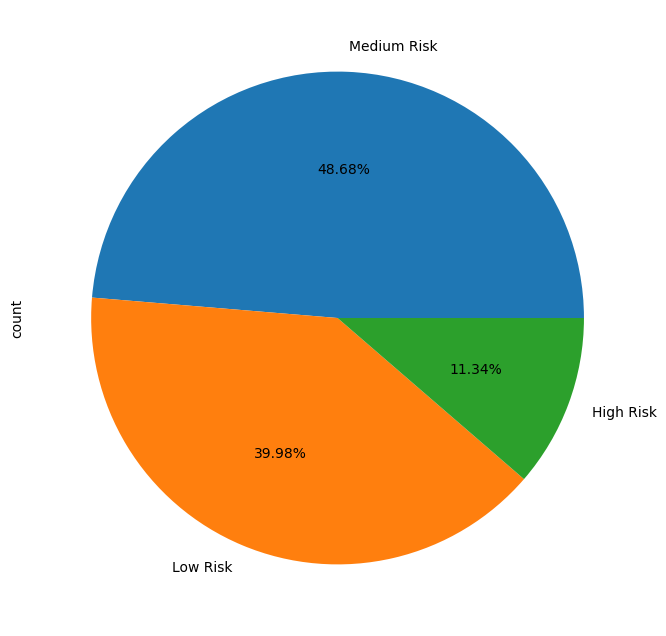

In [62]:
fig,ax1 = plt.subplots(figsize=(8,8))

df_final['loan_risk'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

## Categorical Columns

In [63]:
def categorical_analytic (feature):    
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_final, x=feature, hue='loan_risk')
    plt.title('Categorical Column Analytics')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

    fig,ax1 = plt.subplots(figsize=(8,8))

    df_final[feature].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
    plt.show()

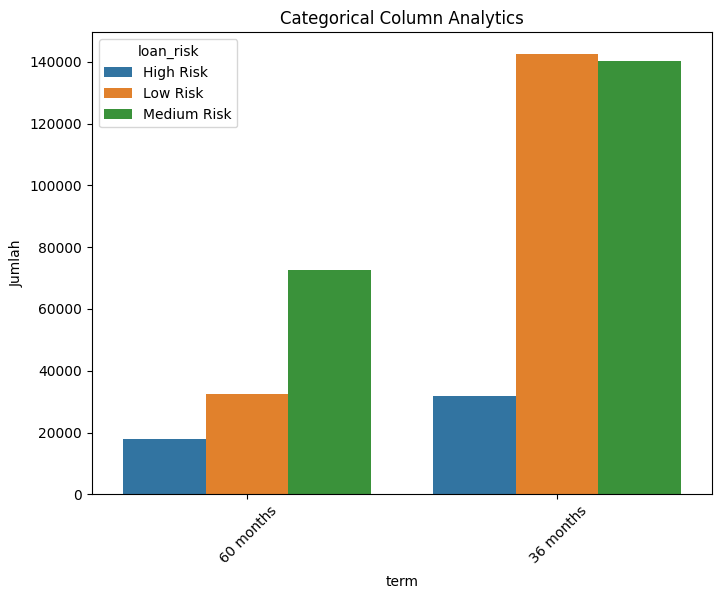

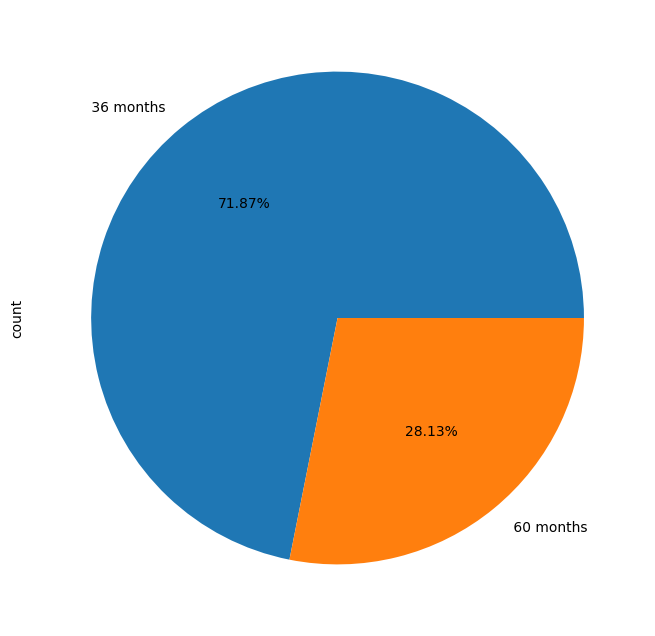

In [64]:
categorical_analytic('term')

Based on term, the bank's customer that has the lowest risk is the bank's customer who chose a 36-month term. So as a data scientist, I suggest the bank prioritise customers who choose a 36-month term to reduce the risk of default payment on credit.


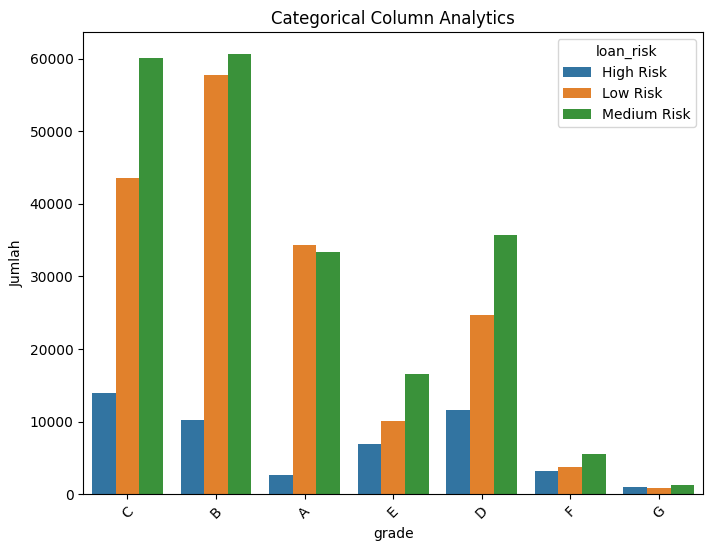

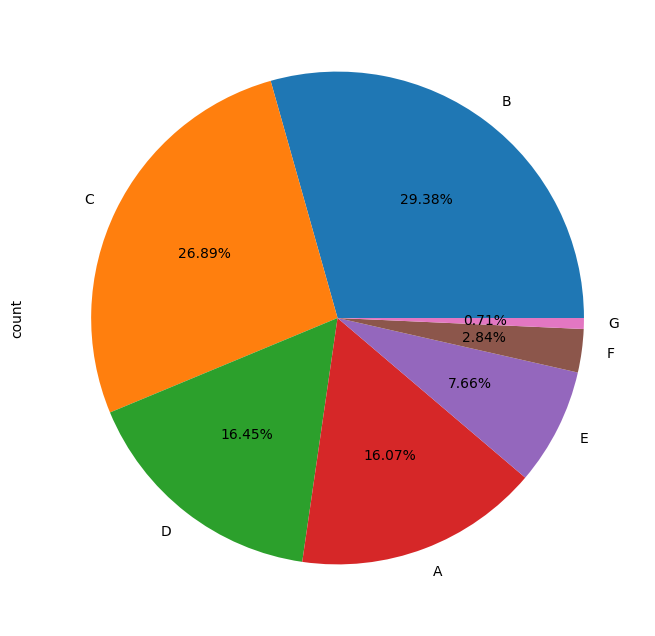

In [65]:
categorical_analytic('grade')

Based on the grade of the customer, bank customers in grades A,B, C, and D have the lowest risk. So as a data scientist, I suggest prioritising customers based on grades A,B, C, and D.


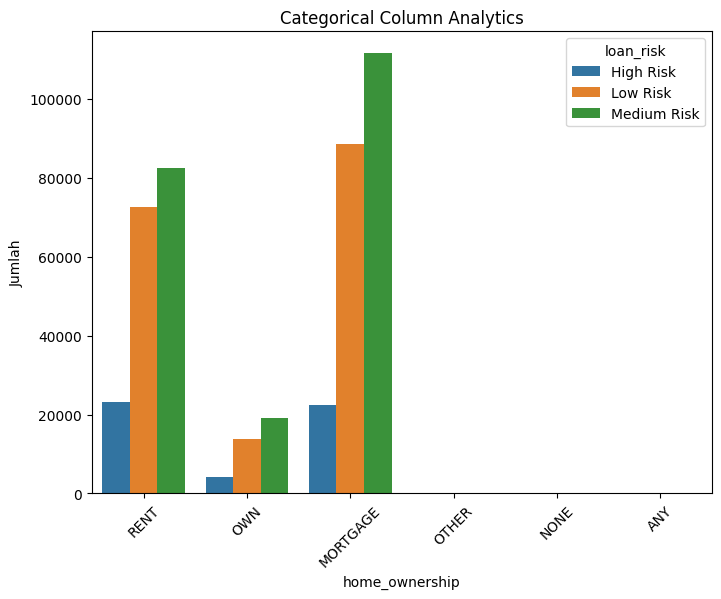

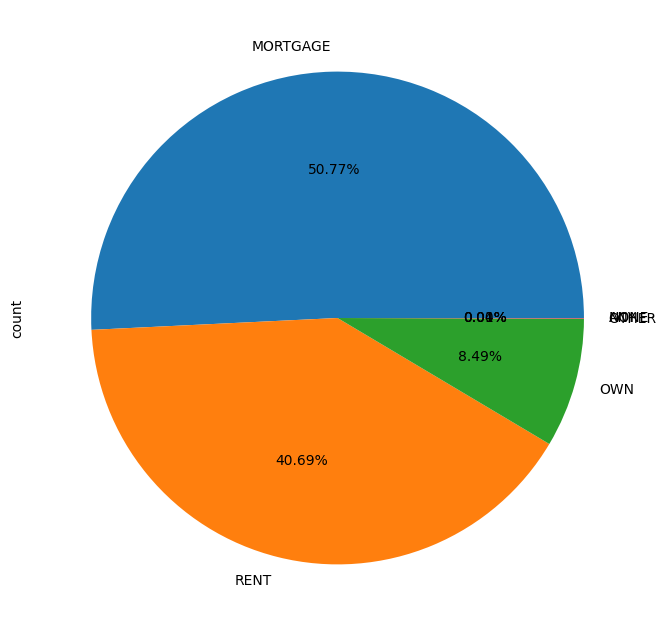

In [66]:
categorical_analytic('home_ownership')

Based on home ownership, there is no effect on loan risk.


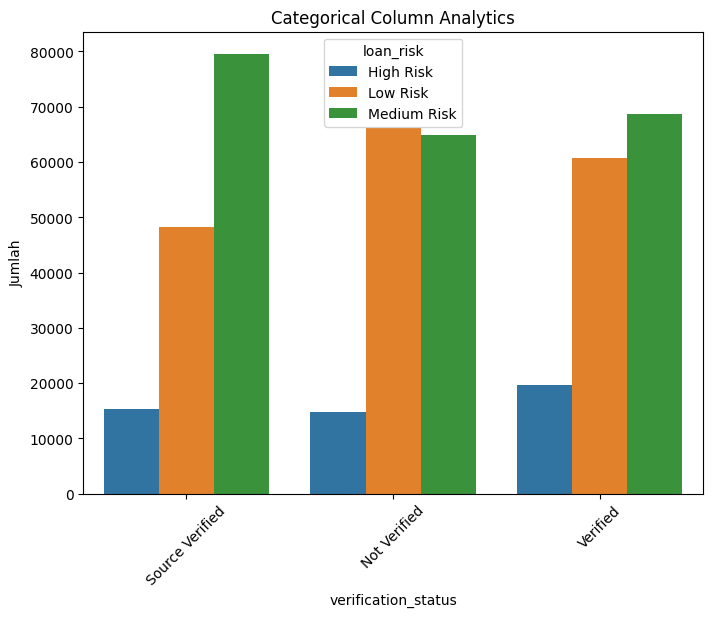

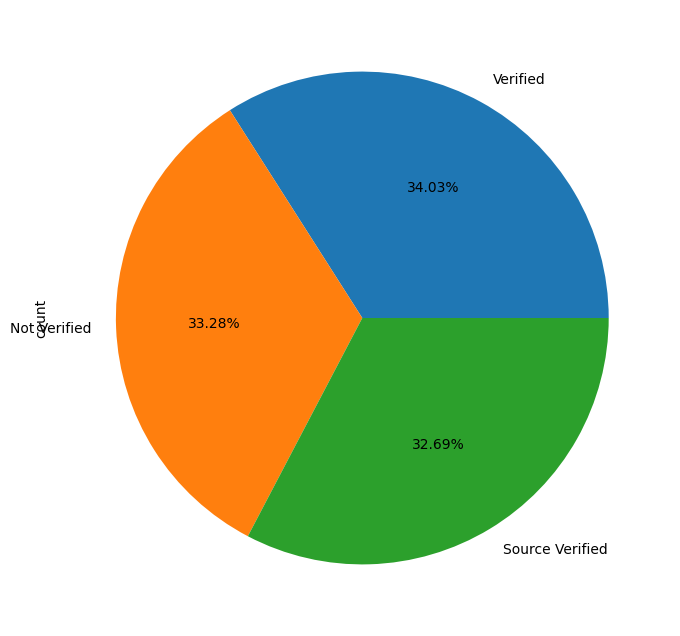

In [67]:
categorical_analytic('verification_status')

Based on verification status, there is no effect on loan risk.


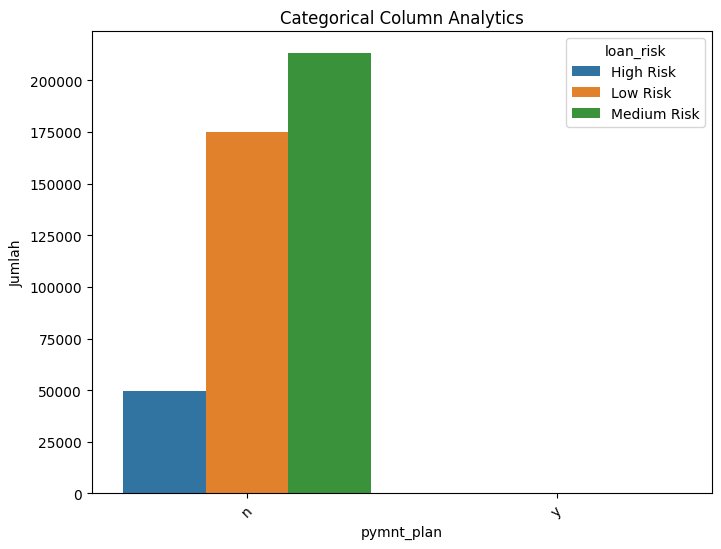

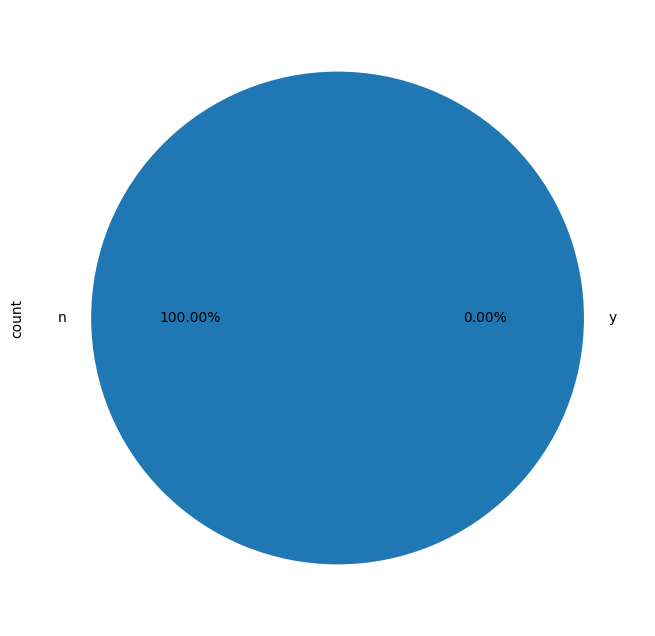

In [68]:
categorical_analytic('pymnt_plan')

Based on payment plan, there is no effect on loan risk.


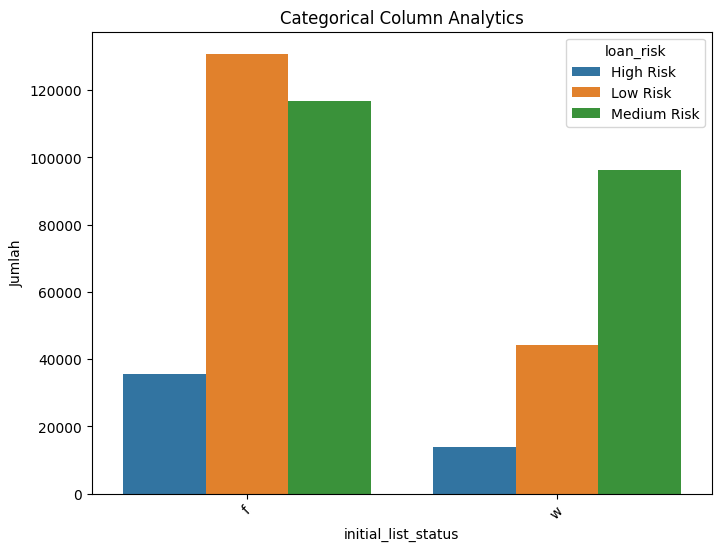

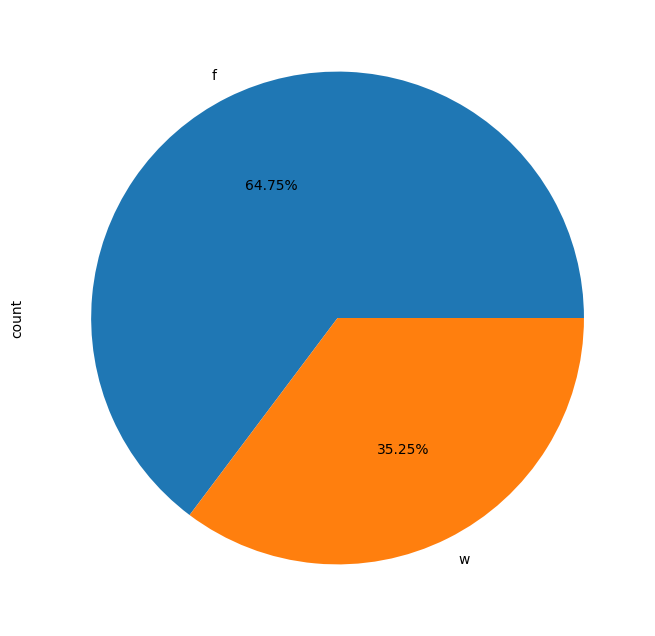

In [69]:
categorical_analytic('initial_list_status')

Based on their initial list status, bank customers who choose fractions have the lowest risk. So as a data scientist, I suggest the bank prioritise the bank customer on fraction type.


So Conclusion for categorical columns is there are some characteristic of customer that indicate as low-risk customer. The characteristic are :
- Choose 36 months term
- Has grade on A,B,C and D
- Choose fractions on initial list status

## Numerical Columns

In [85]:
def numerical_analytic(feature):

    plt.figure(figsize=(10, 6))
    sns.barplot(x='loan_risk', y=feature, data=df_final, estimator=np.mean, ci=None)
    plt.title(f'Mean of {feature} on loan_risk')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loan_risk', y=feature, data=df_final)
    plt.title(f'Box plot of {feature} on loan_risk')
    plt.show()
    
    print('------CORRELATION------')

    correlation, p_value = kendalltau(df_final['loan_risk'], df_final[feature])
    if p_value <0.05 :
        print ('There is correlation between', feature ,'with loan risk')

    else :
        print('There is no correlation between', feature ,'with loan risk')





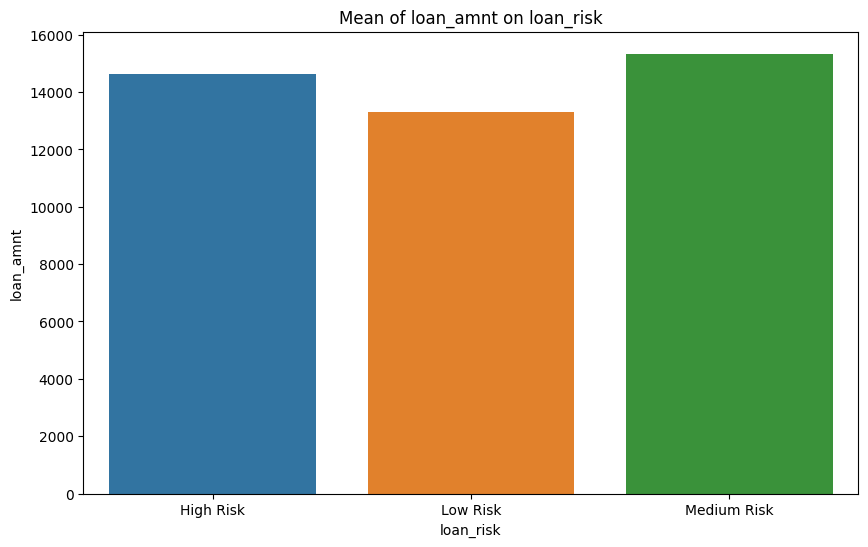

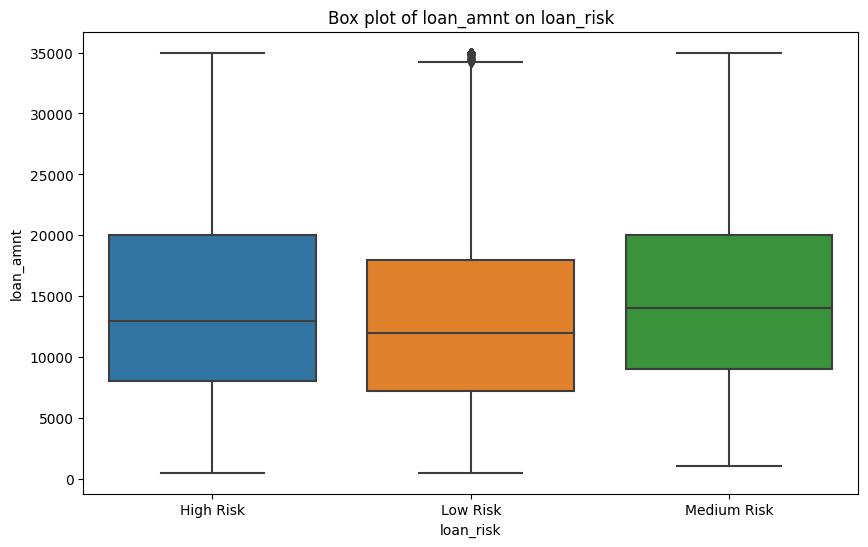

------CORRELATION------
There is correlation between loan_amnt with loan risk


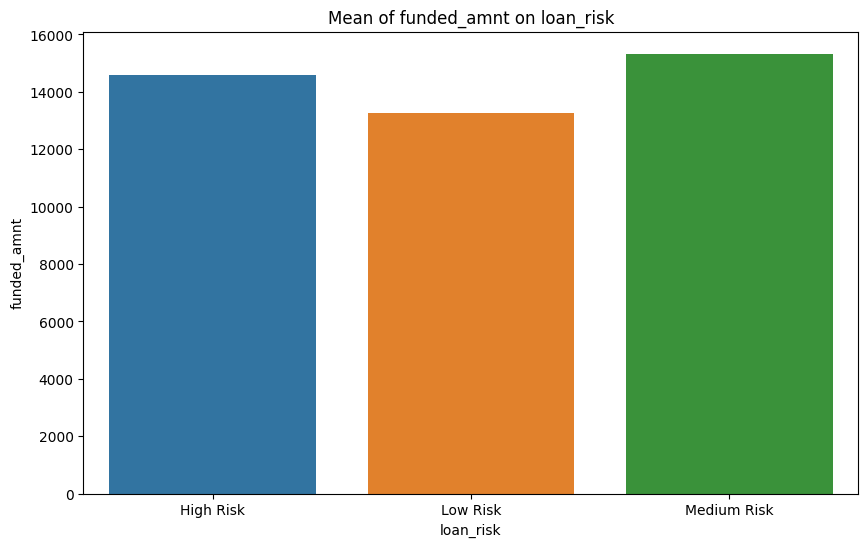

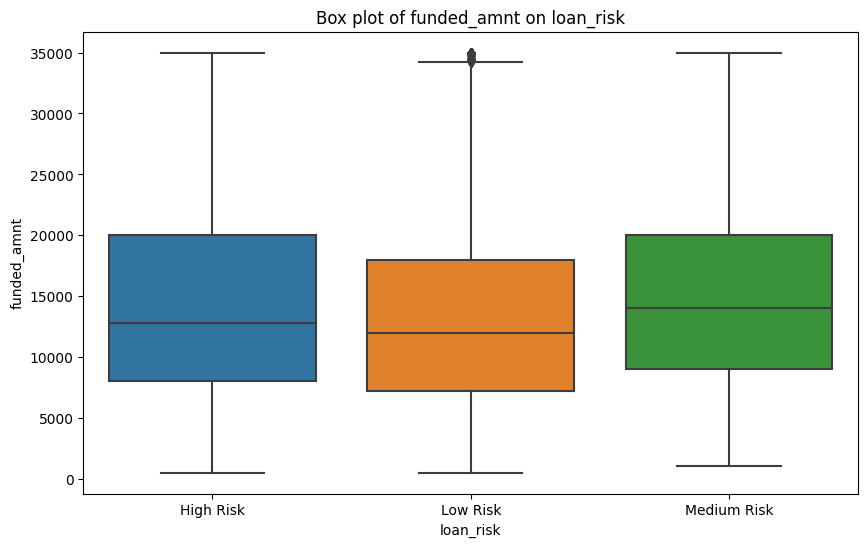

------CORRELATION------
There is correlation between funded_amnt with loan risk


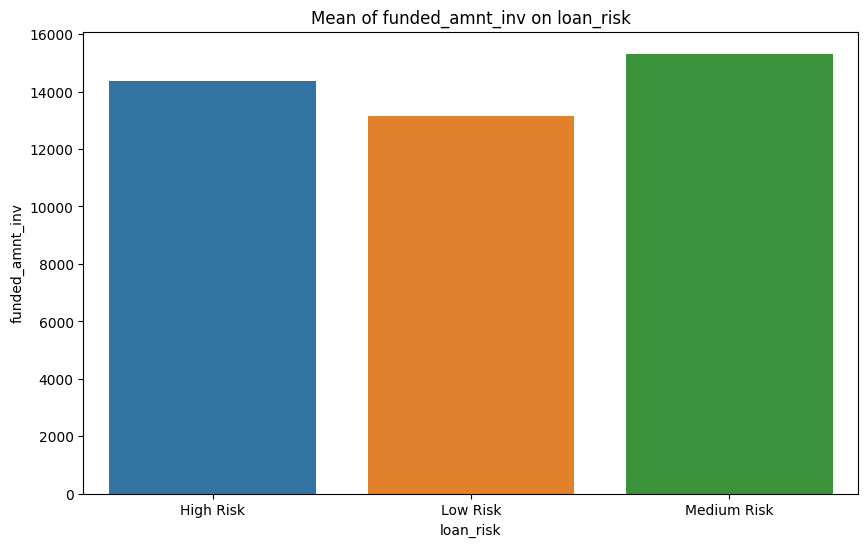

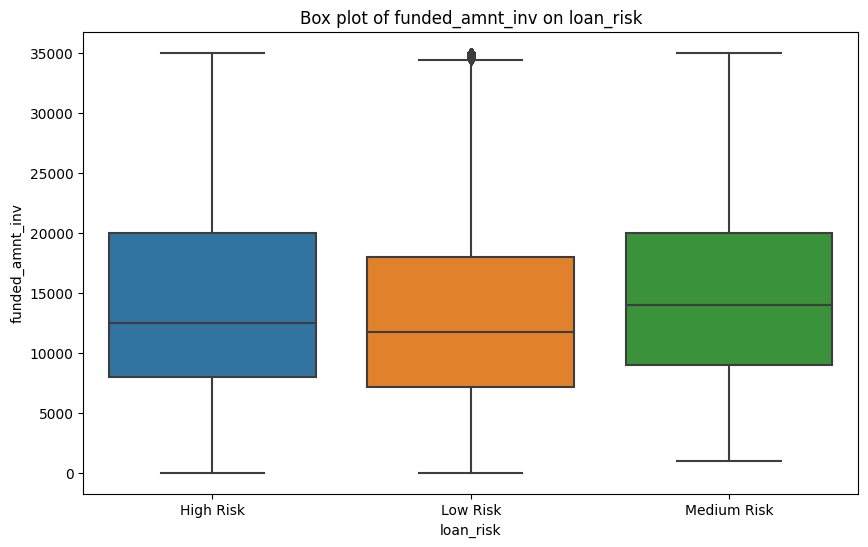

------CORRELATION------
There is correlation between funded_amnt_inv with loan risk


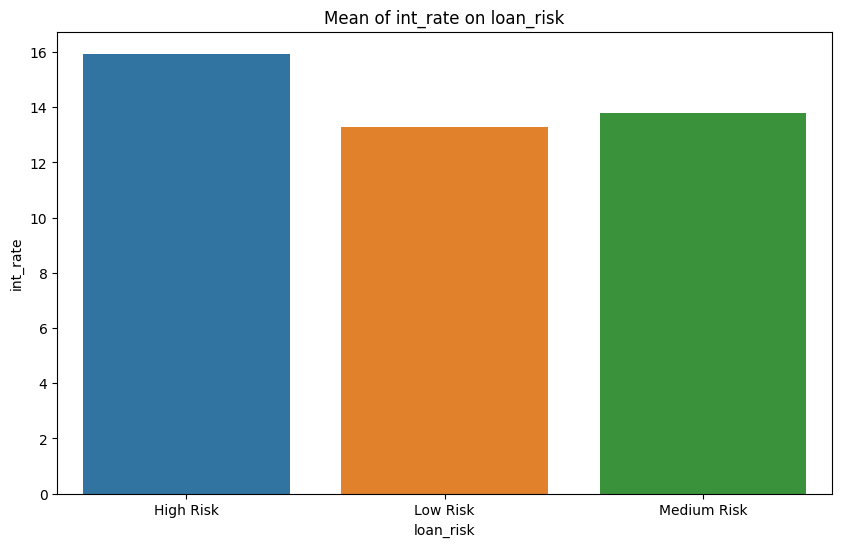

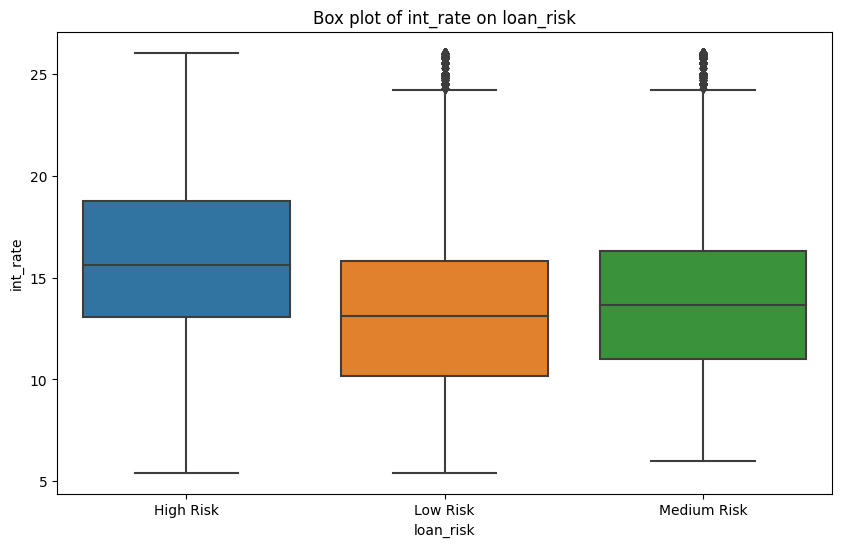

------CORRELATION------
There is correlation between int_rate with loan risk


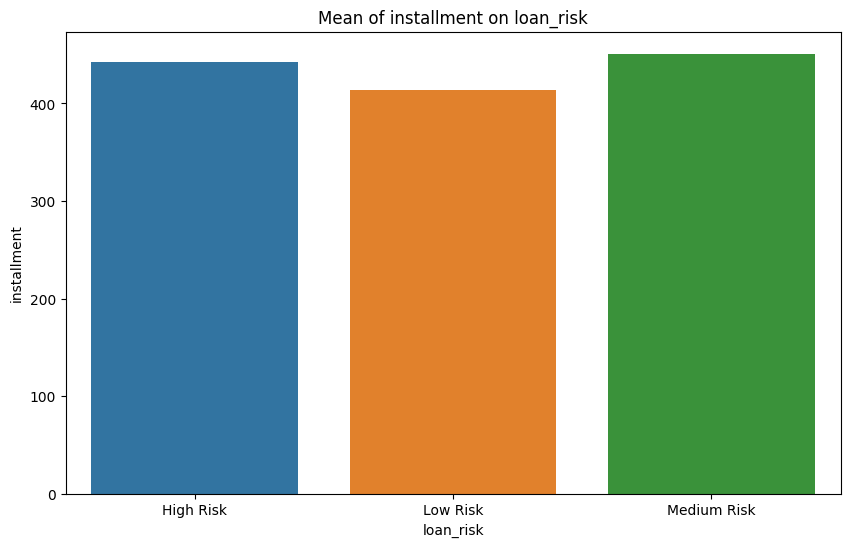

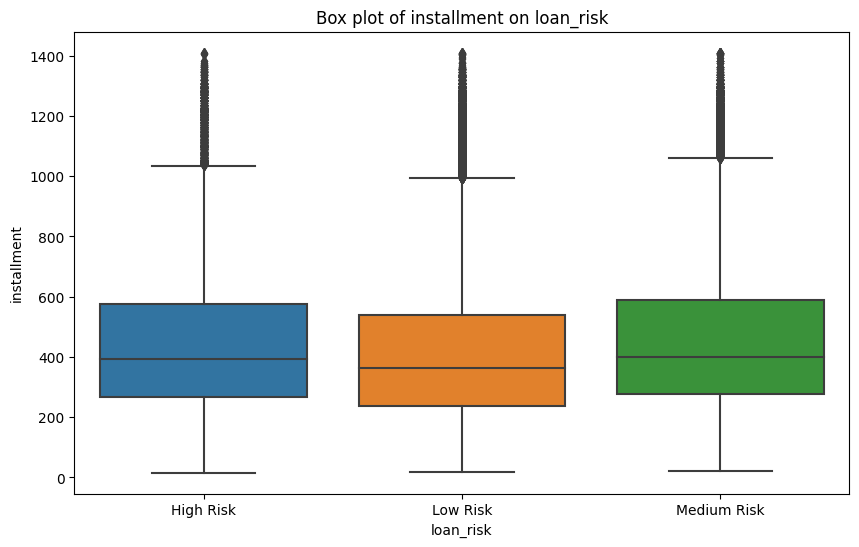

------CORRELATION------
There is correlation between installment with loan risk


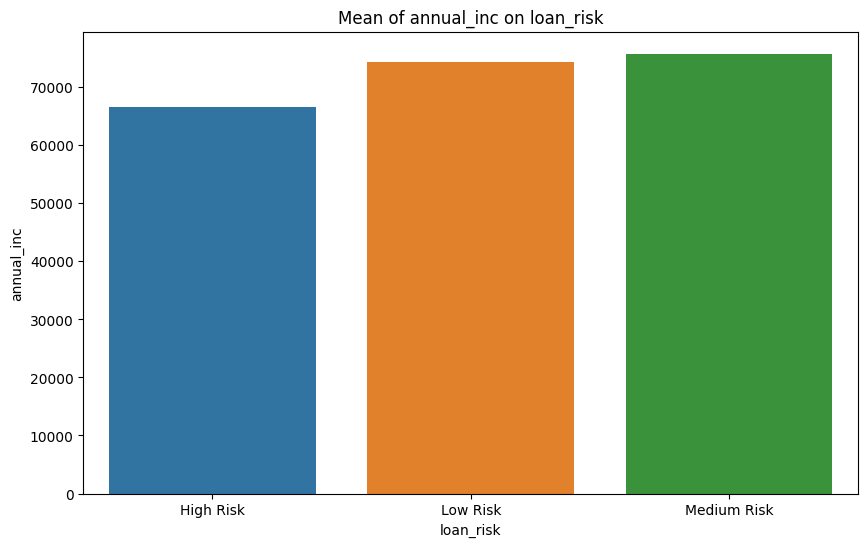

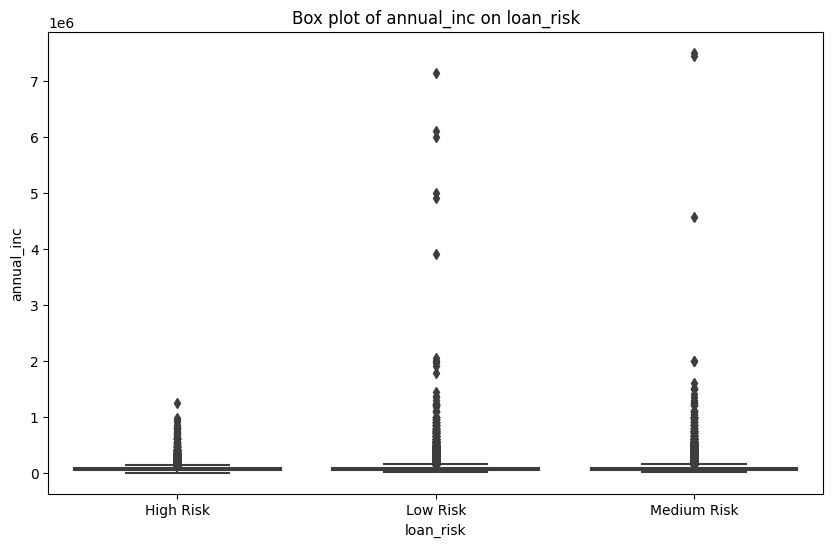

------CORRELATION------
There is correlation between annual_inc with loan risk


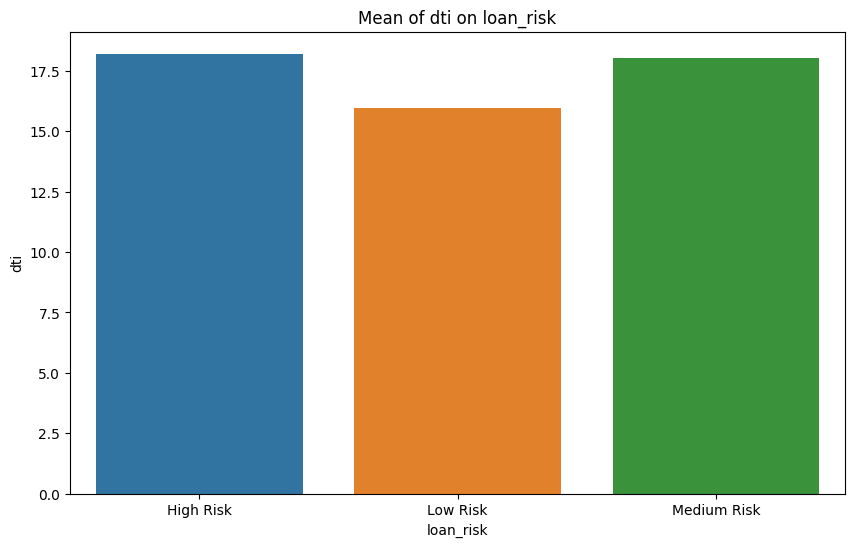

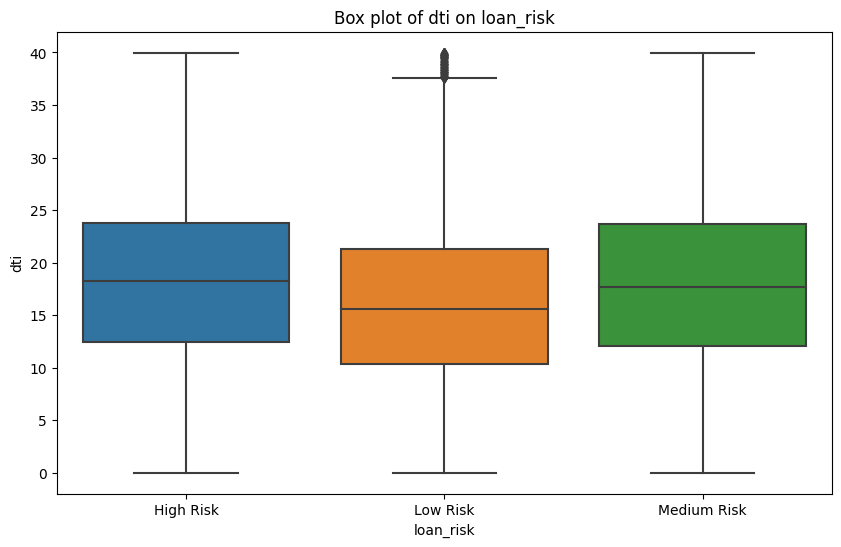

------CORRELATION------
There is correlation between dti with loan risk


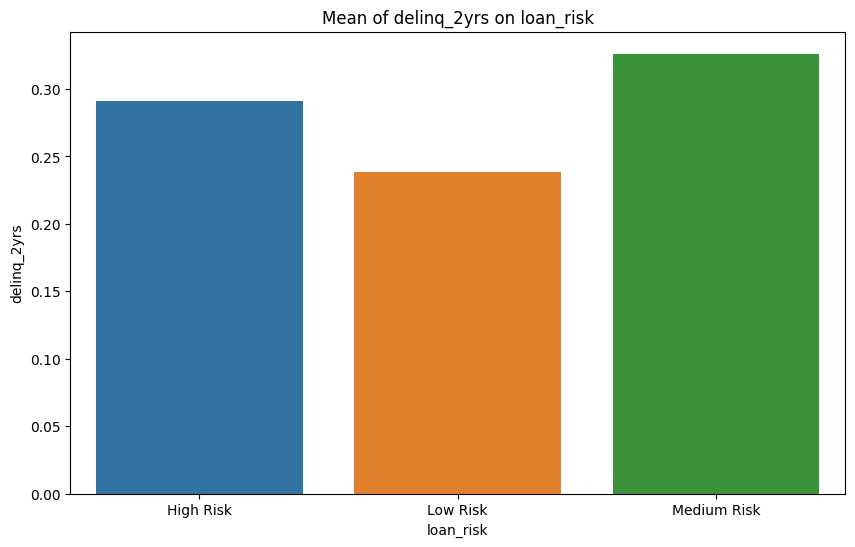

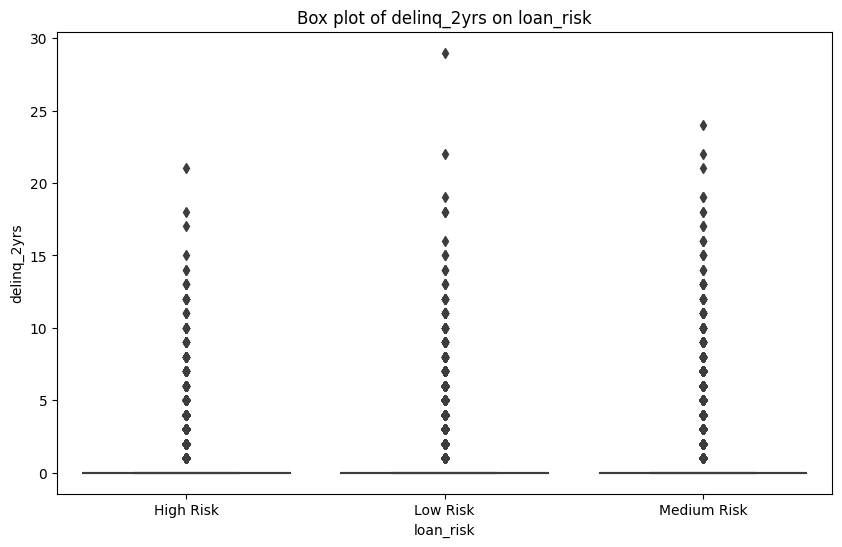

------CORRELATION------
There is correlation between delinq_2yrs with loan risk


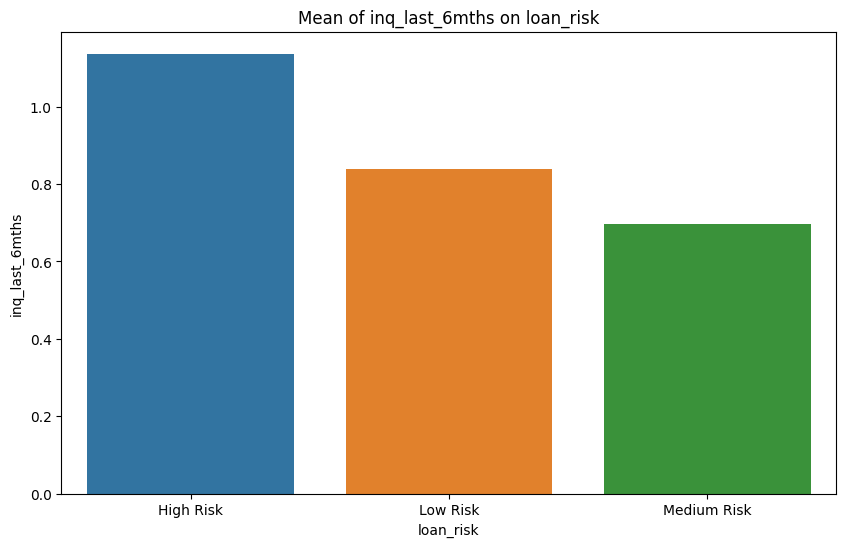

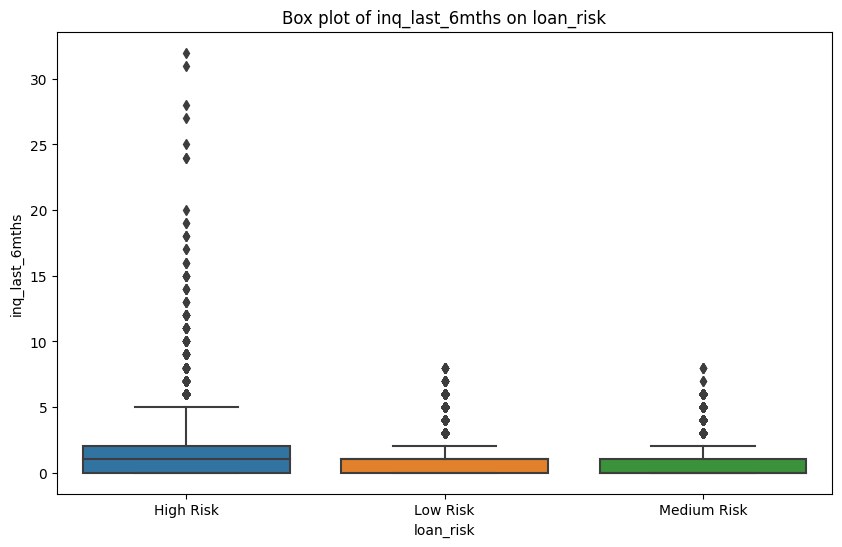

------CORRELATION------
There is correlation between inq_last_6mths with loan risk


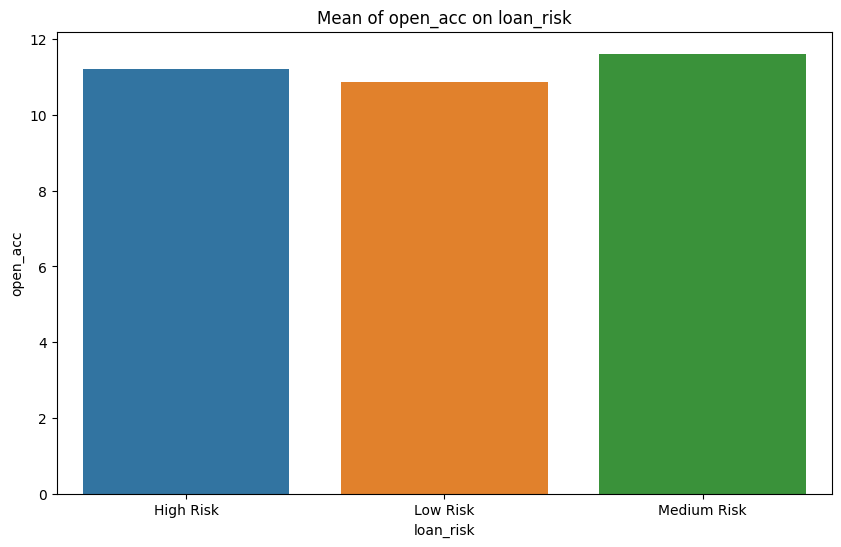

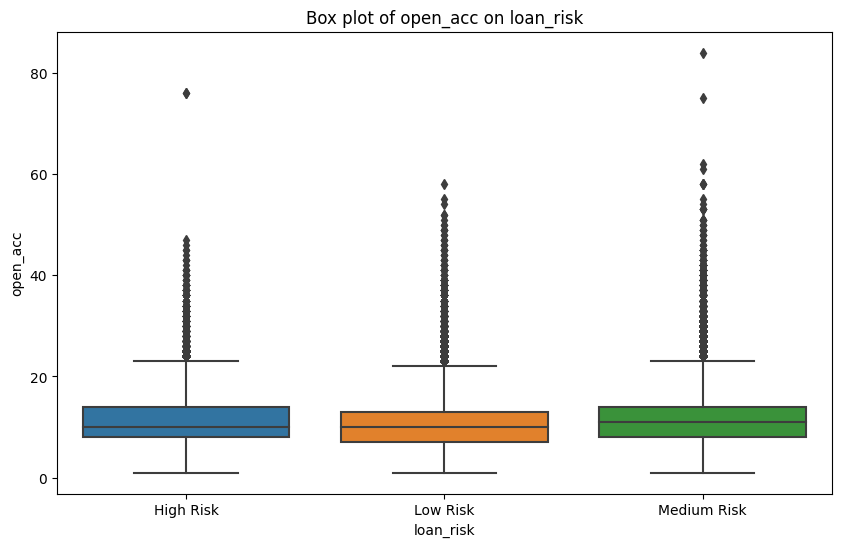

------CORRELATION------
There is correlation between open_acc with loan risk


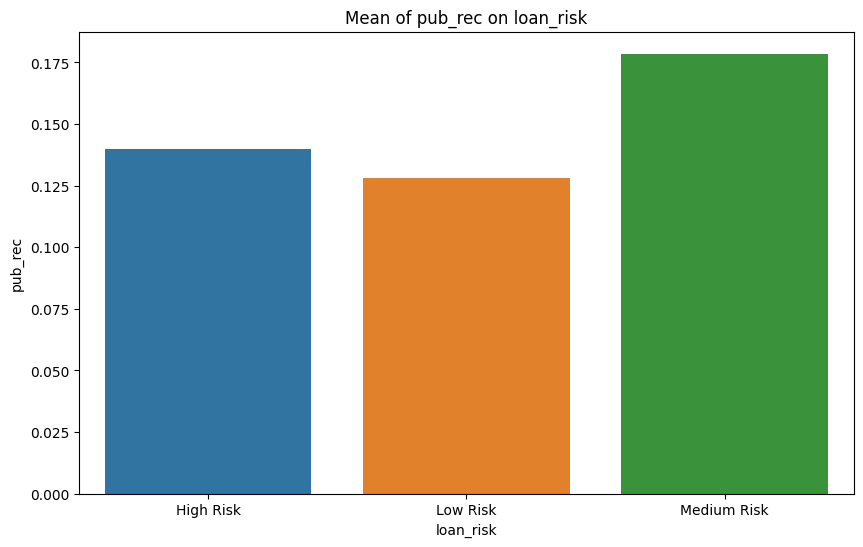

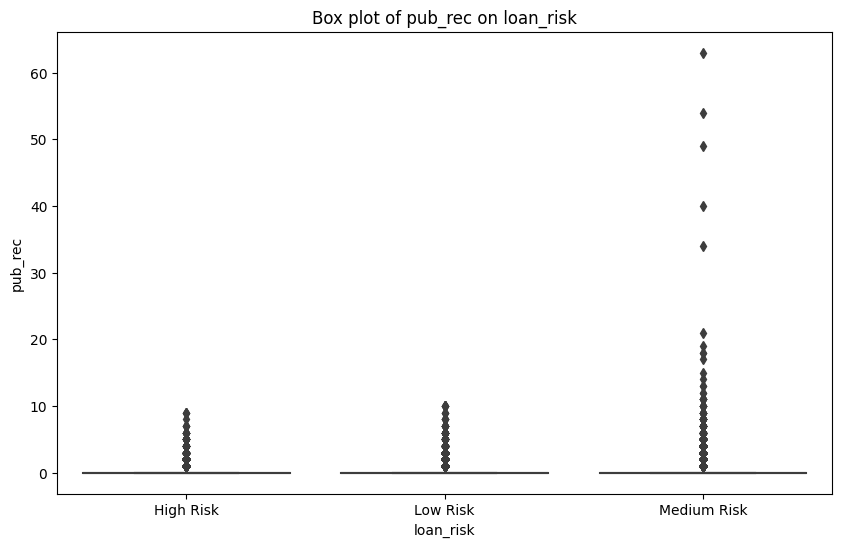

------CORRELATION------
There is correlation between pub_rec with loan risk


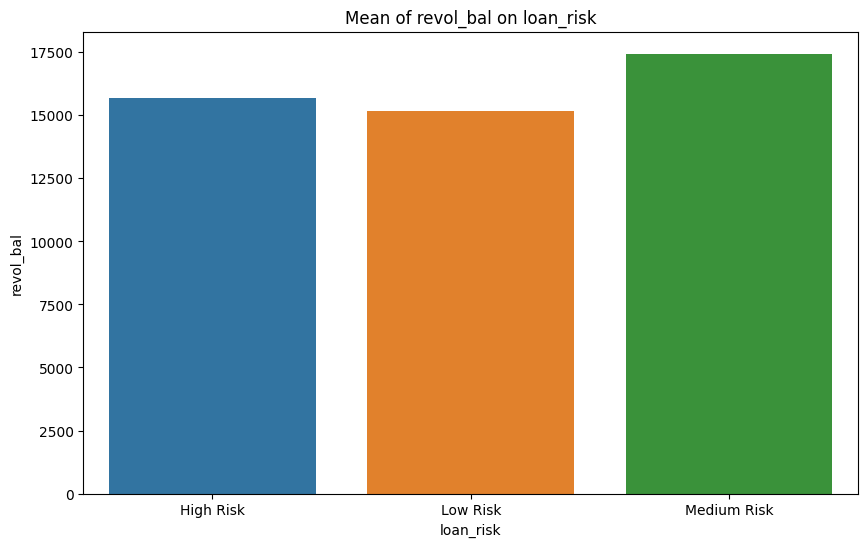

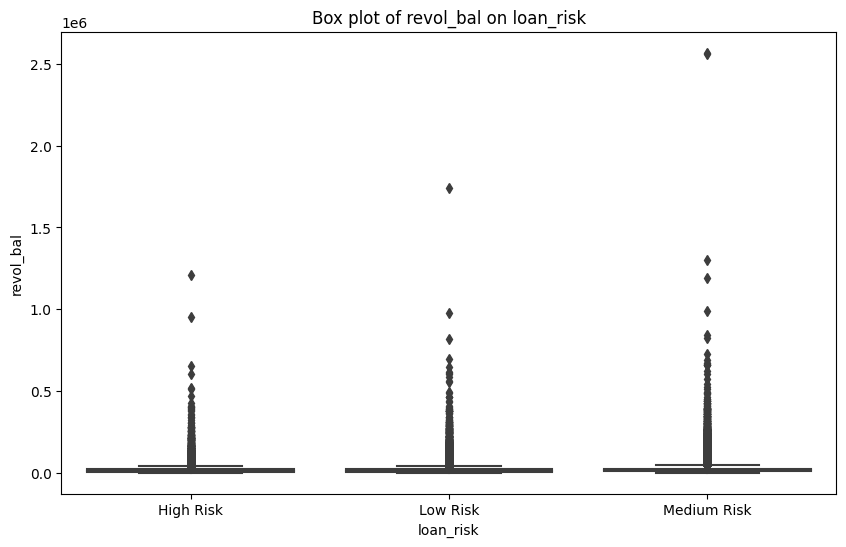

------CORRELATION------
There is correlation between revol_bal with loan risk


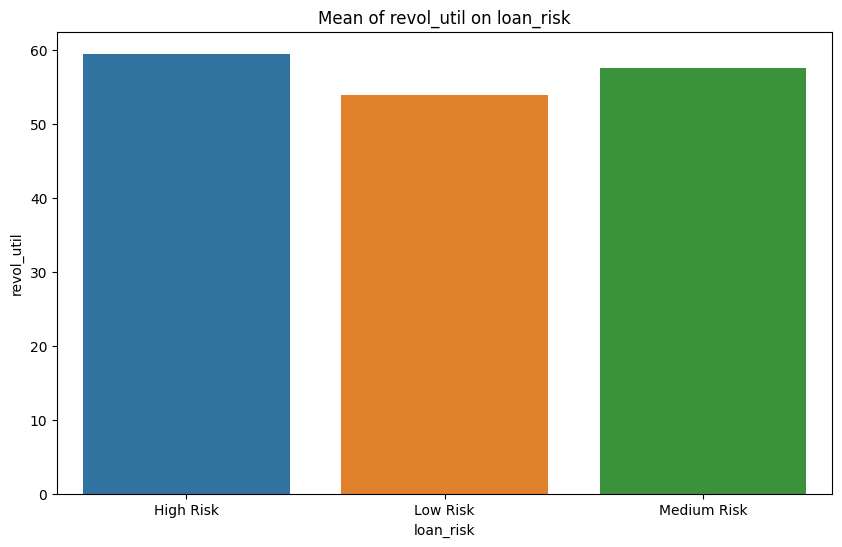

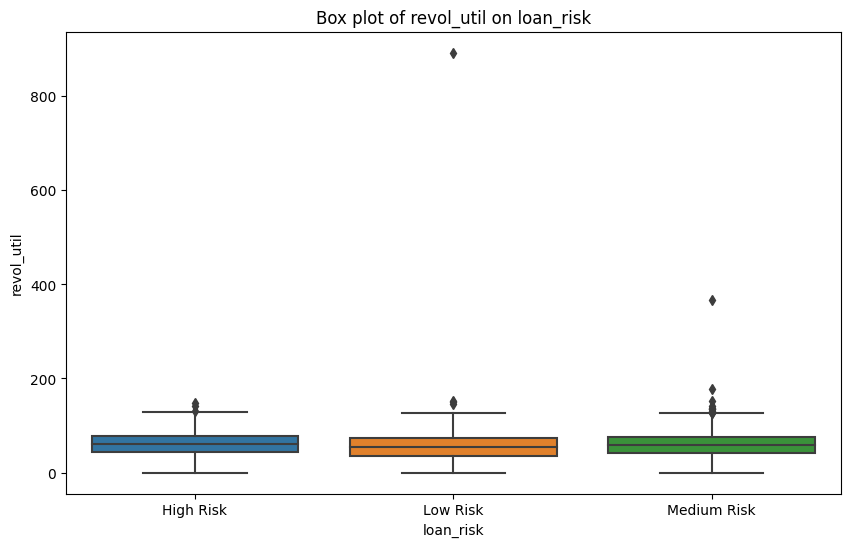

------CORRELATION------
There is correlation between revol_util with loan risk


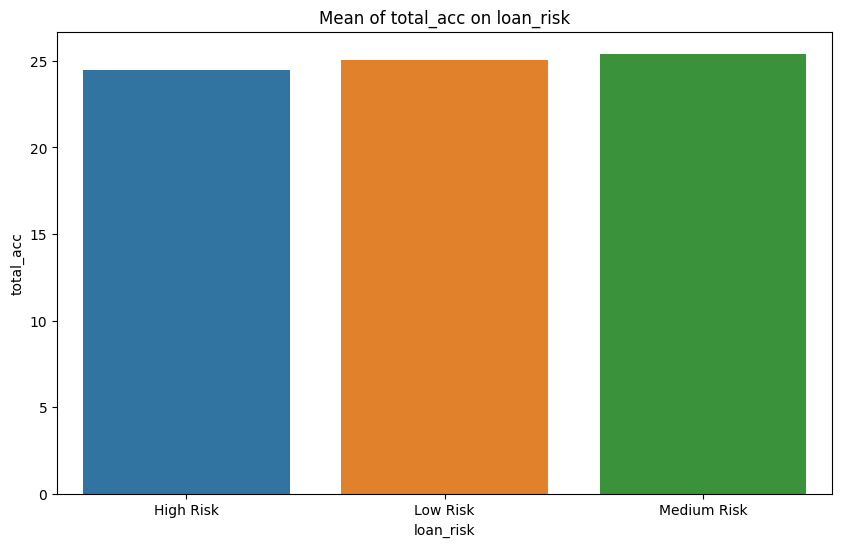

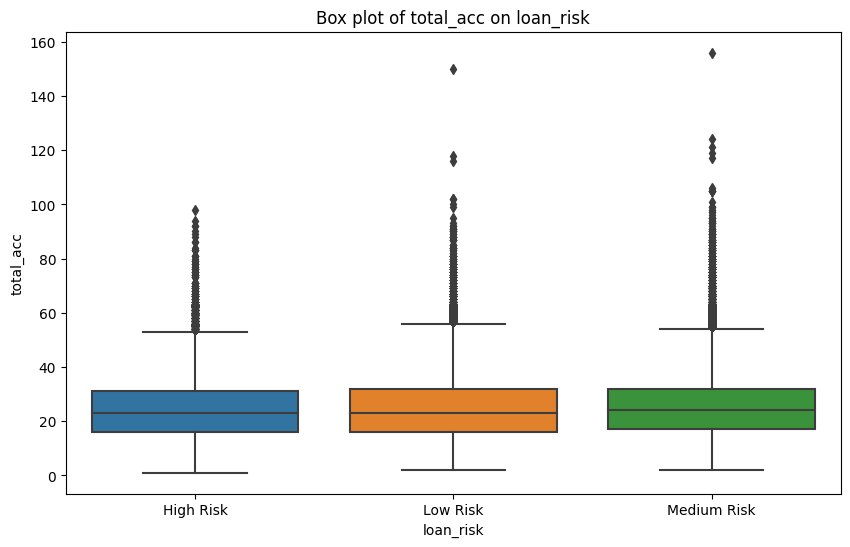

------CORRELATION------
There is correlation between total_acc with loan risk


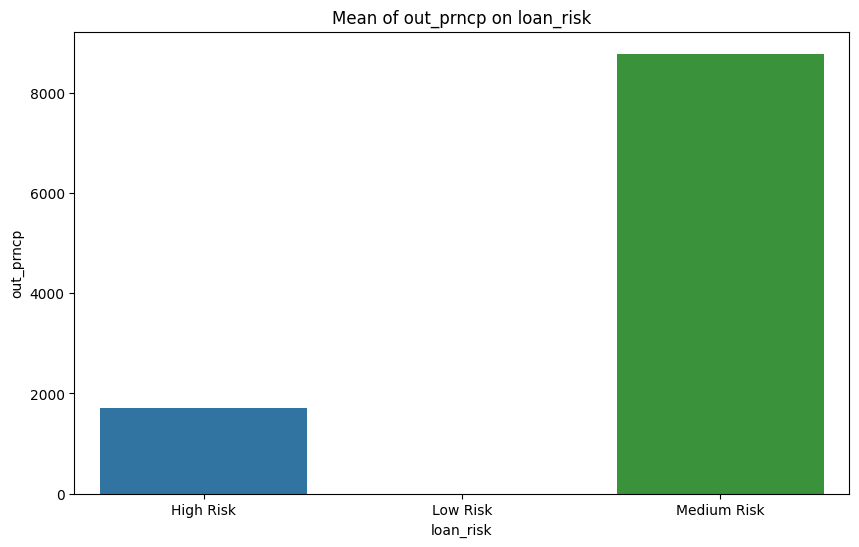

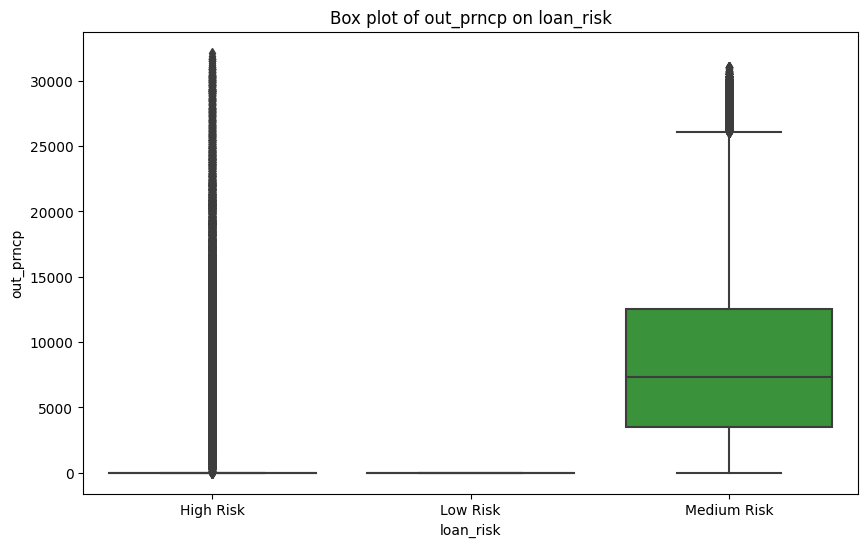

------CORRELATION------
There is correlation between out_prncp with loan risk


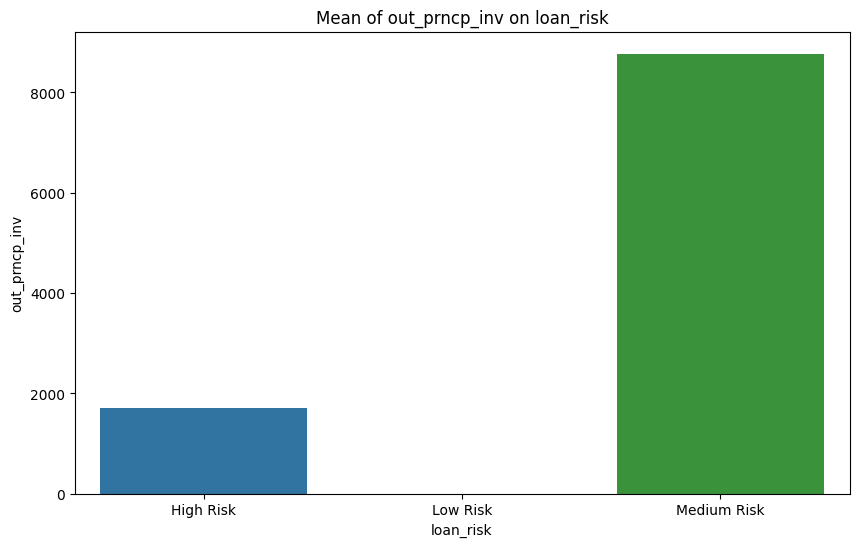

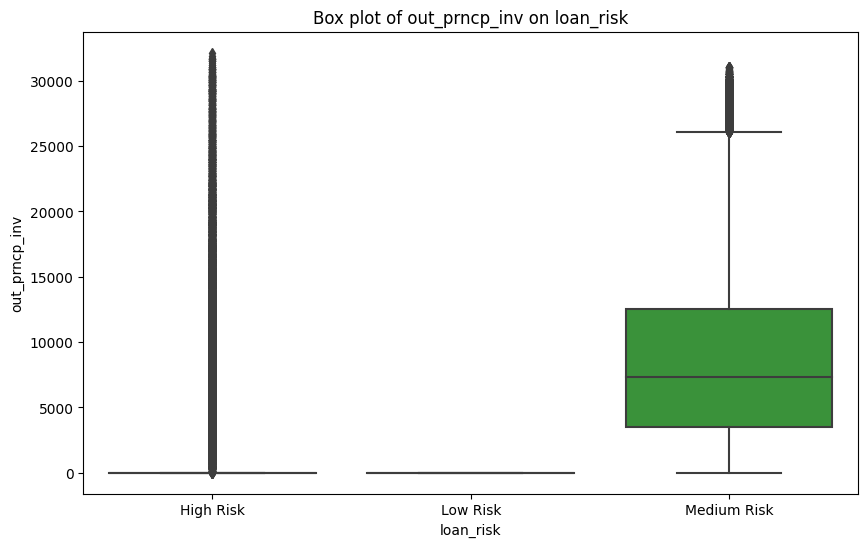

------CORRELATION------
There is correlation between out_prncp_inv with loan risk


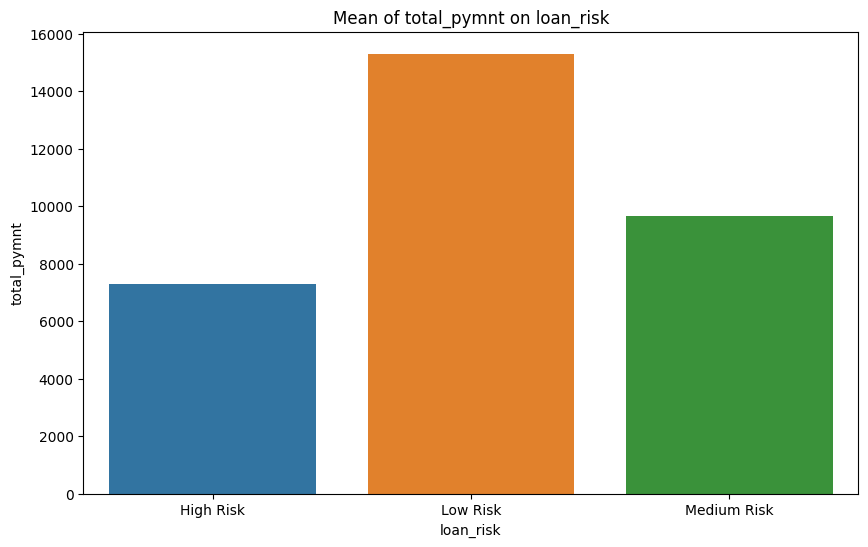

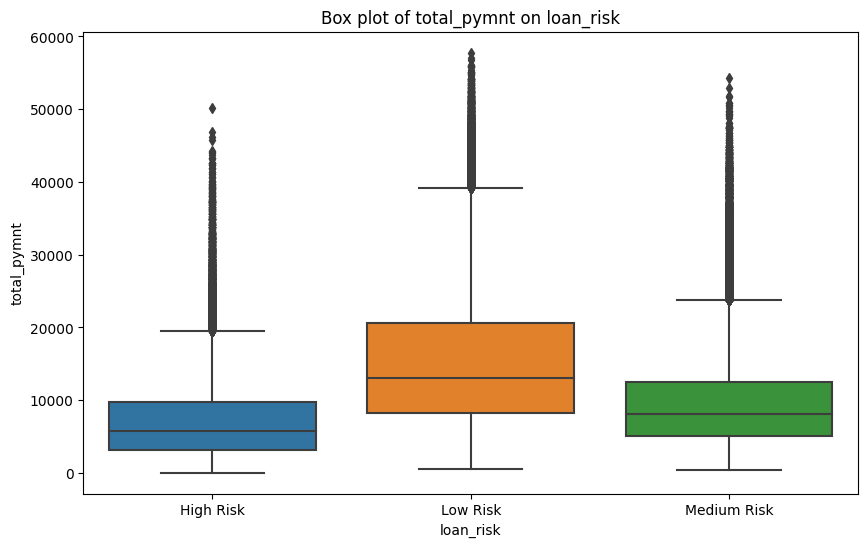

------CORRELATION------
There is correlation between total_pymnt with loan risk


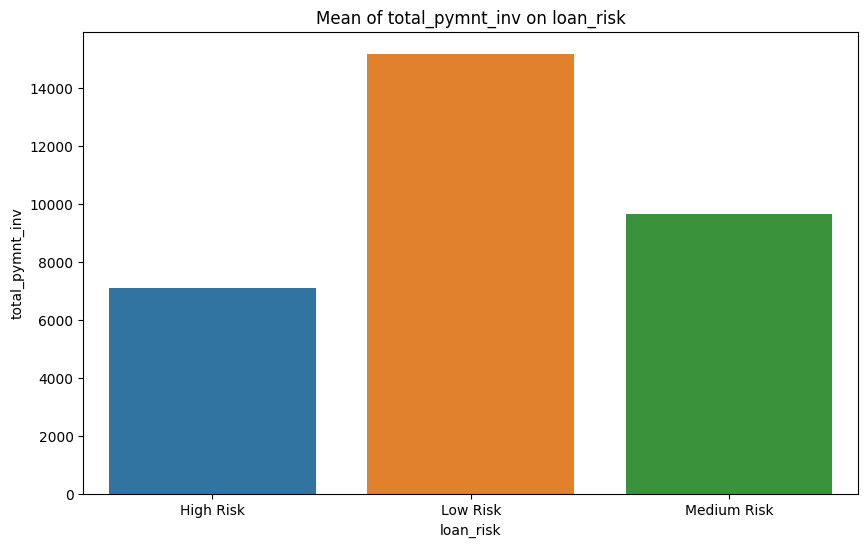

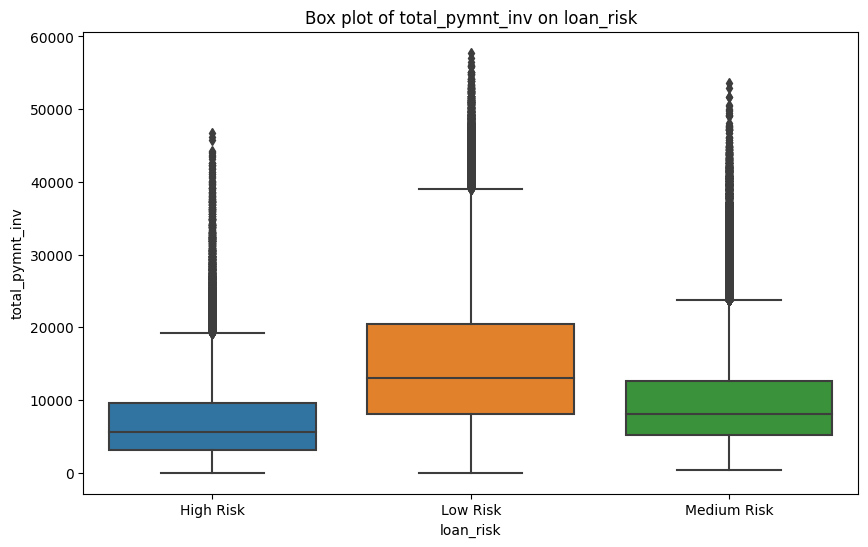

------CORRELATION------
There is correlation between total_pymnt_inv with loan risk


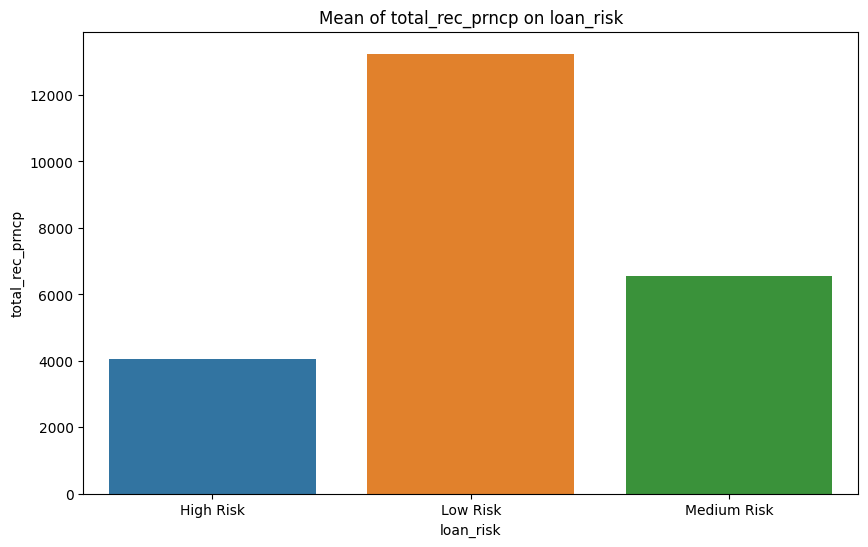

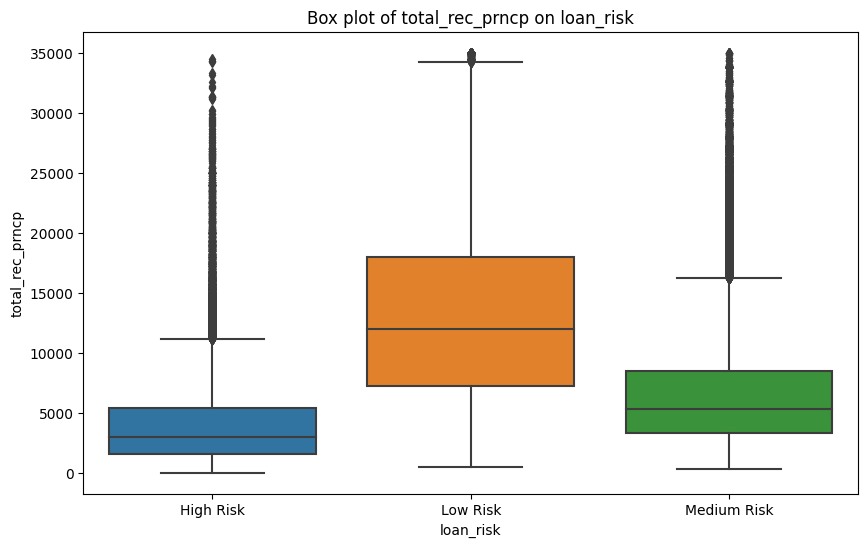

------CORRELATION------
There is correlation between total_rec_prncp with loan risk


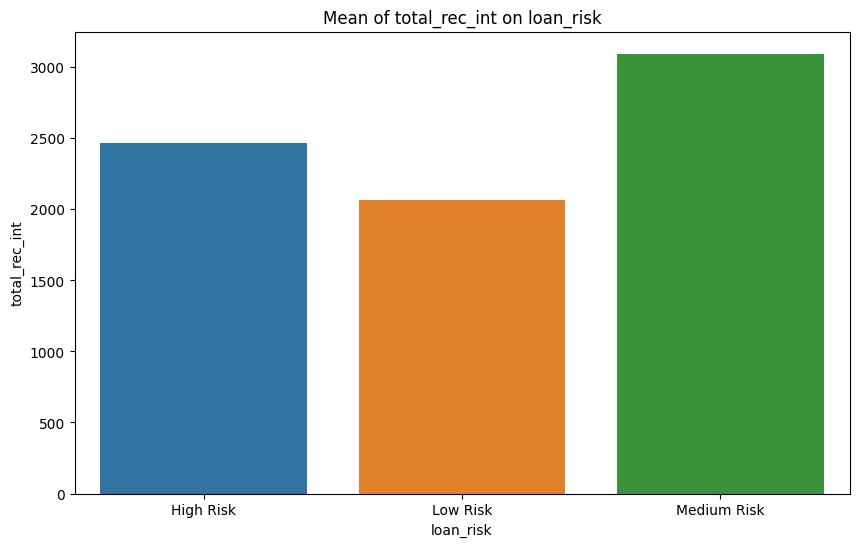

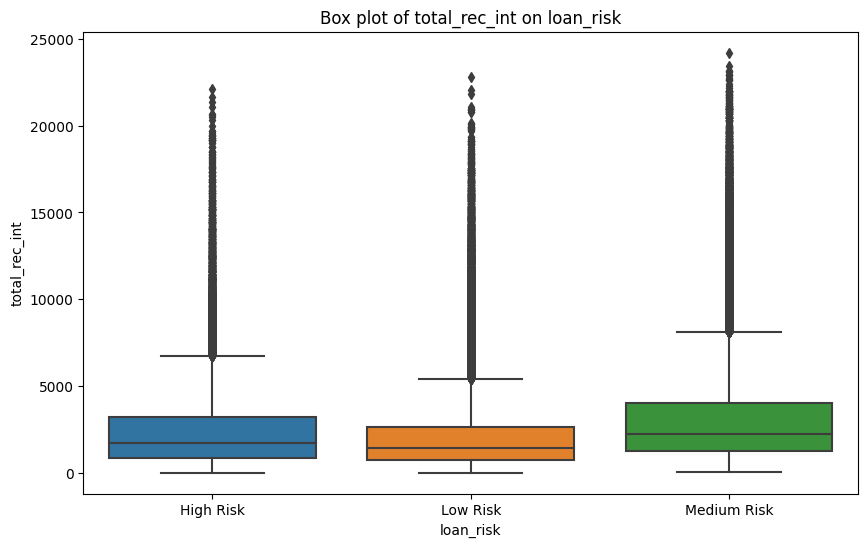

------CORRELATION------
There is correlation between total_rec_int with loan risk


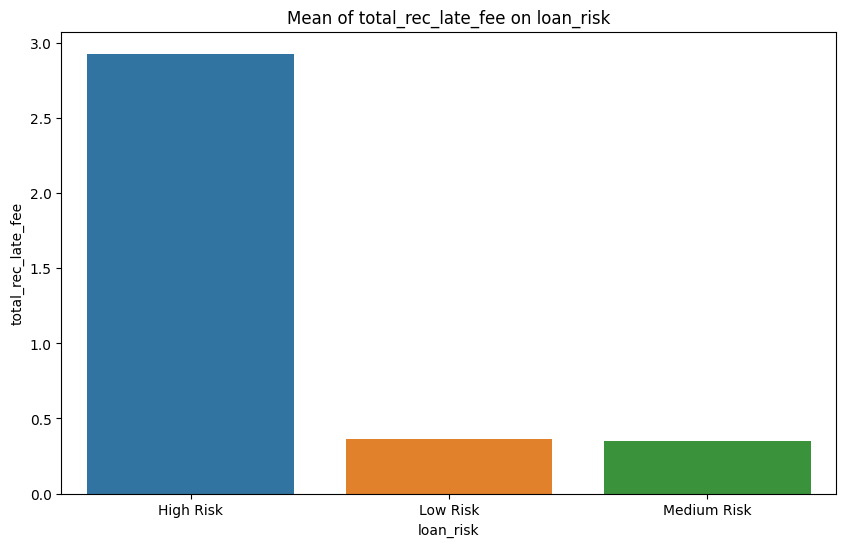

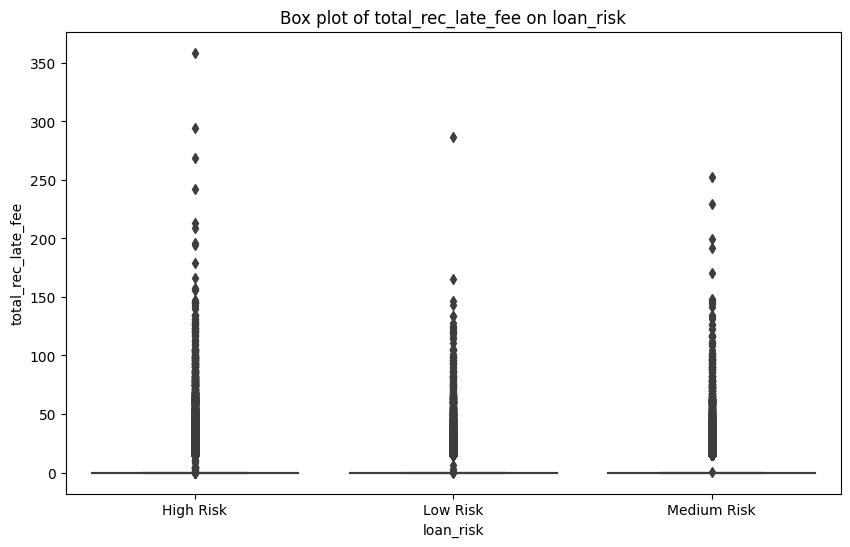

------CORRELATION------
There is correlation between total_rec_late_fee with loan risk


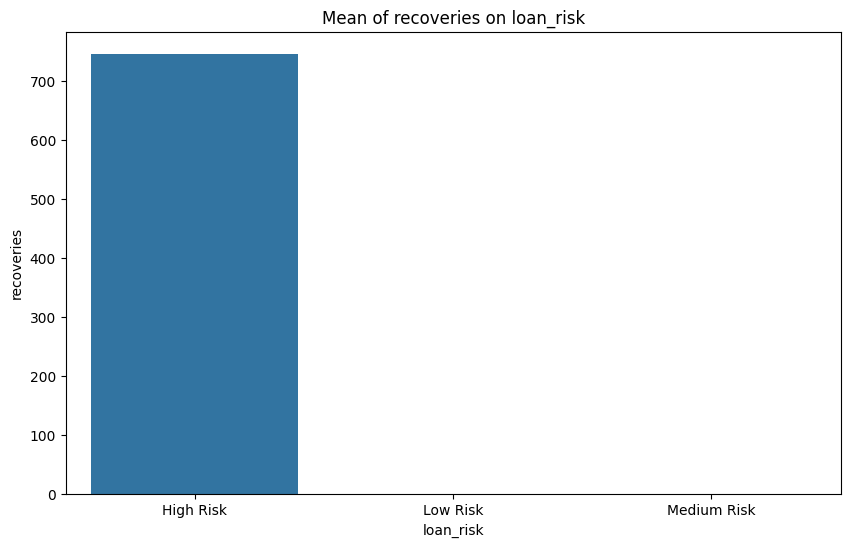

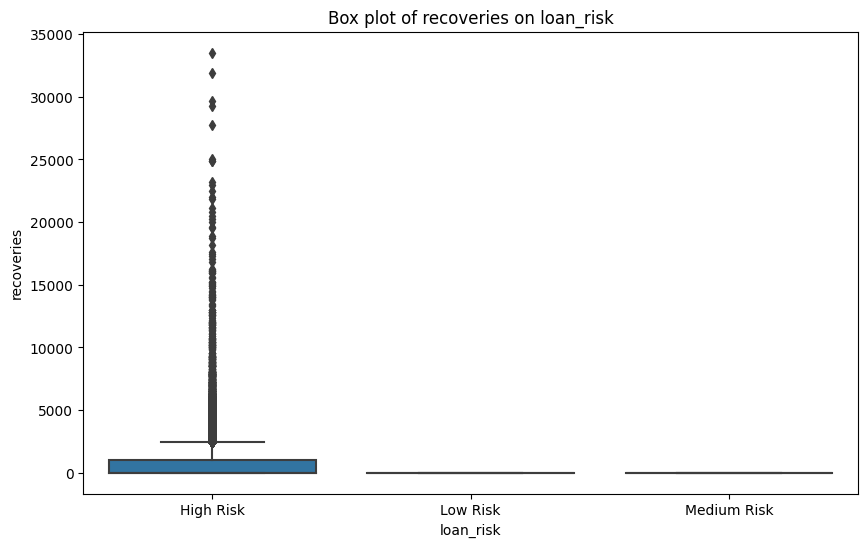

------CORRELATION------
There is correlation between recoveries with loan risk


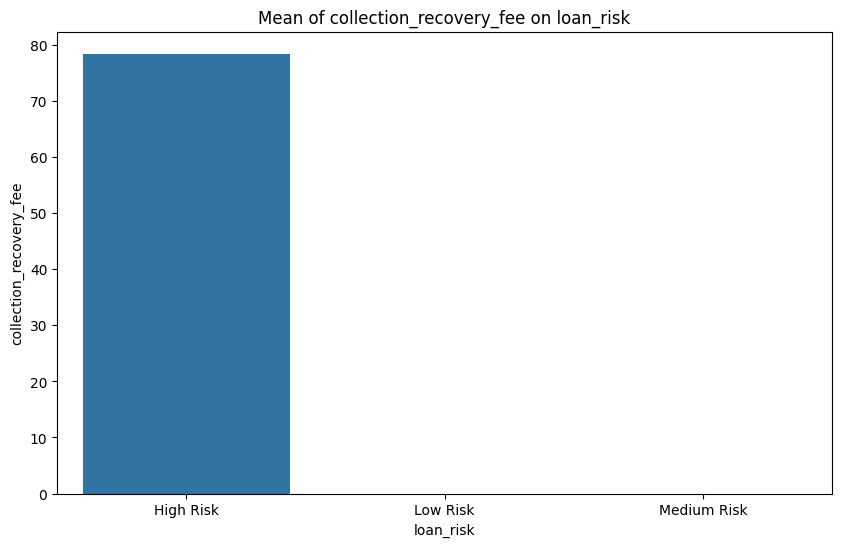

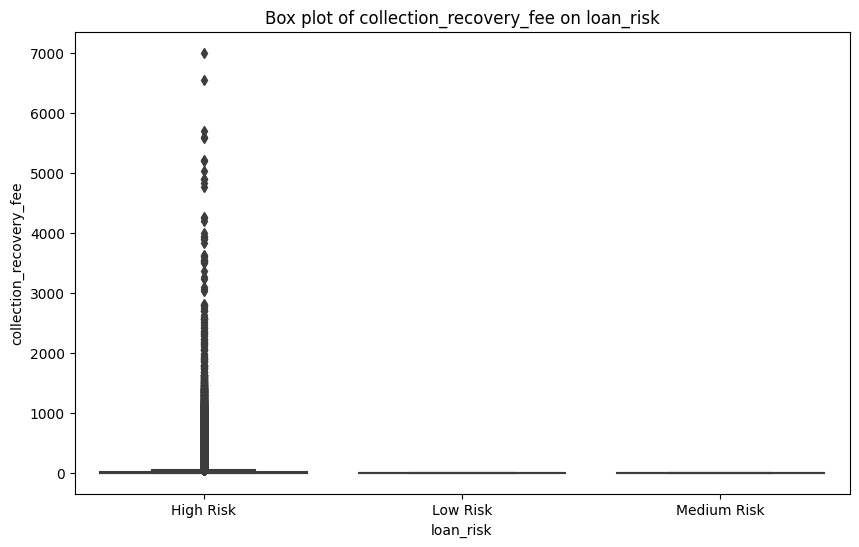

------CORRELATION------
There is correlation between collection_recovery_fee with loan risk


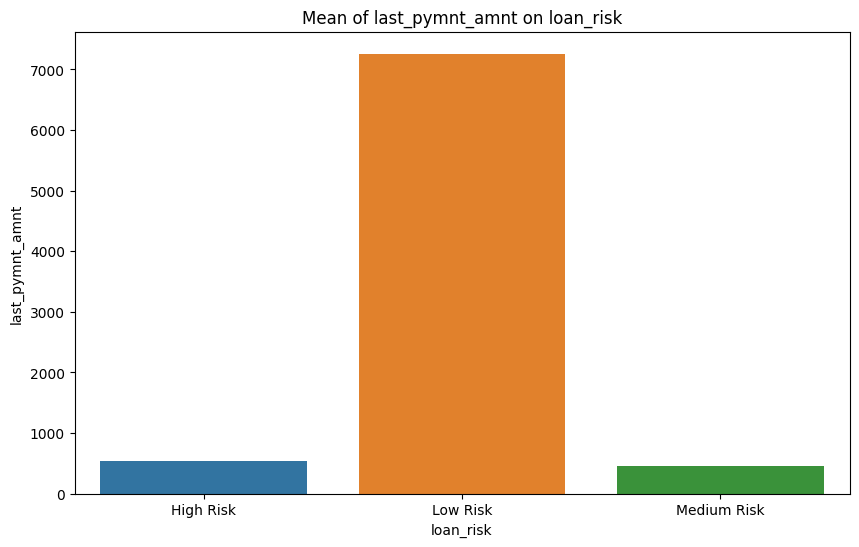

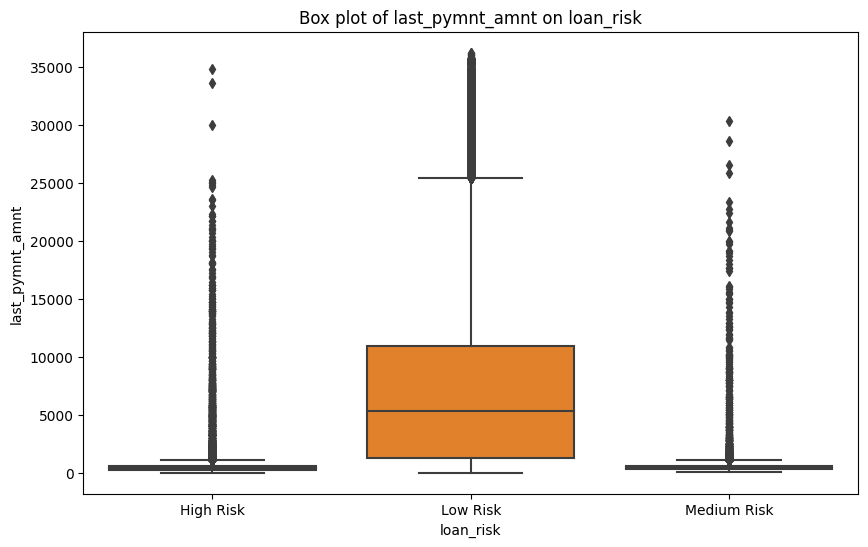

------CORRELATION------
There is correlation between last_pymnt_amnt with loan risk


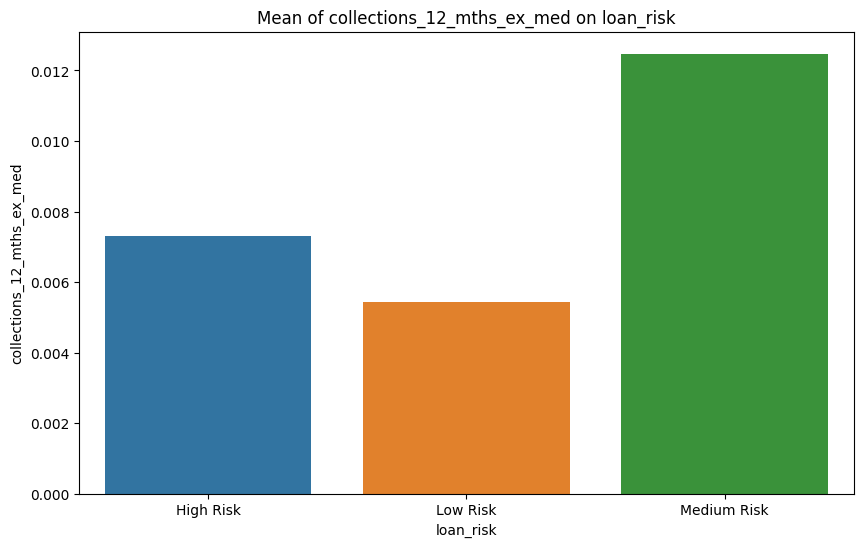

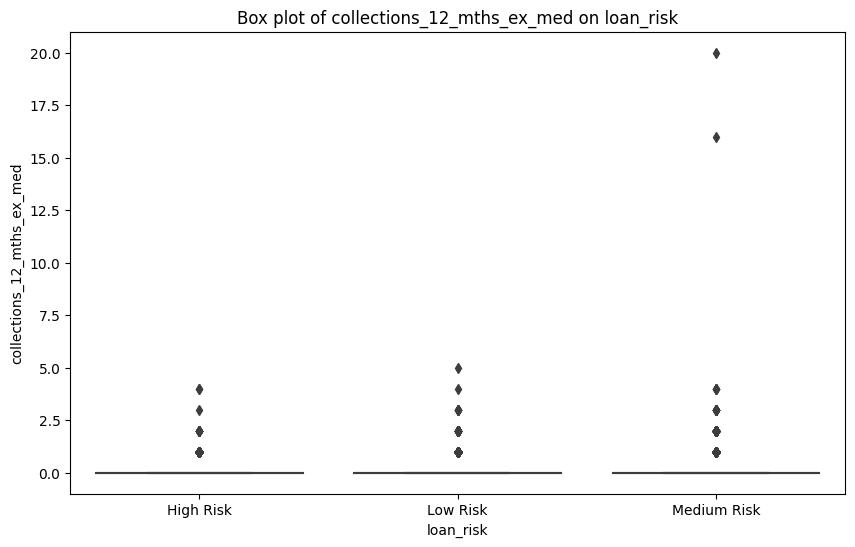

------CORRELATION------
There is correlation between collections_12_mths_ex_med with loan risk


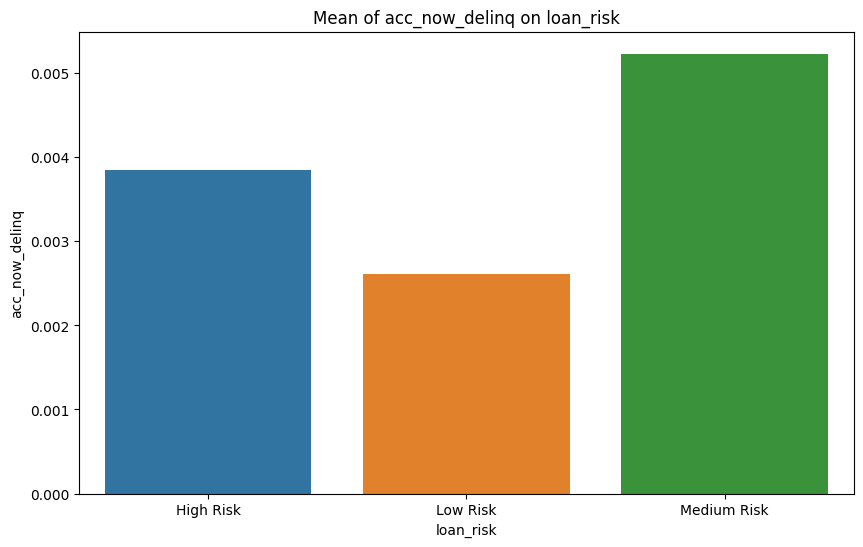

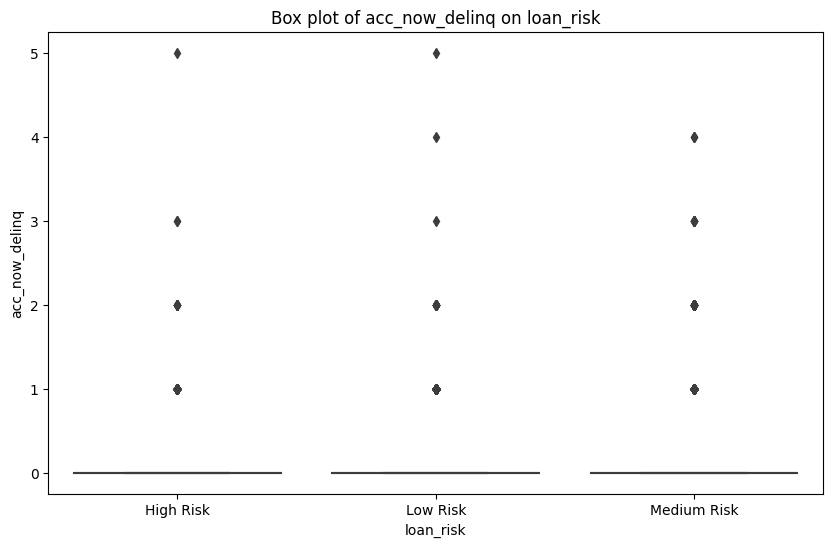

------CORRELATION------
There is correlation between acc_now_delinq with loan risk


In [98]:
for i in col_num:
    numerical_analytic(i)

Conclusion for categorical column is most of all numerical columns has correlation with loan risk but there are some best characteristic that influence the risk of bank customer. The characteristic of low-risk customer are : 
- Has out principal on low condition 
- Has total payment on high condition 
- Has total rec principal on high condition 
- Has total rec late fee on low condition 
- Has recovery on low condition 
- Has last payment amount on high condition

# Feature Engineering 

In [76]:
correlation_num = []
for i in col_num:
    correlation, p_value = kendalltau(df_final['loan_risk'], df_final[i])


    if p_value <0.05 :
        correlation_num.append(i)
print('The column that has correlation with loan status are', correlation_num)

The column that has correlation with loan status are ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq']


In [105]:
correlation_cat = []
for i in col_cat :
    tabel_korelasi = pd.crosstab(df_final['loan_risk'], df_final[i])
    tes_korelasi = stats.chi2_contingency(tabel_korelasi)
    pval = tes_korelasi.pvalue
    corr = tes_korelasi.statistic
    
    if i == 'loan_risk':
        pass
    
    elif pval < 0.05 :
        correlation_cat.append(i)
        print(i,'pvalue ;',pval,'correlation :',corr)

print('')
print('The column that has correlation with loan status are ', correlation_cat)




term pvalue ; 0.0 correlation : 13117.519653920215
grade pvalue ; 0.0 correlation : 16716.435751372665
home_ownership pvalue ; 0.0 correlation : 1479.7007570866829
verification_status pvalue ; 0.0 correlation : 5321.841702111433
pymnt_plan pvalue ; 0.00015718956268364706 correlation : 17.516116150631234
initial_list_status pvalue ; 0.0 correlation : 18094.949704815008

The column that has correlation with loan status are  ['term', 'grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'initial_list_status']


In [106]:
print('Total numerical columns that will be used on this case is ', len(correlation_num))
print('Total categorical columns that will be used on this case is ', len(correlation_cat))

Total numerical columns that will be used on this case is  26
Total categorical columns that will be used on this case is  6


In [107]:
# Data fix setelah feature
data_final = pd.concat([df_final[correlation_num],df_final[correlation_cat],df_final['loan_risk']],axis=1)
data_final

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,term,grade,home_ownership,verification_status,pymnt_plan,initial_list_status,loan_risk
0,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,...,119.66,0.0,0.0,60 months,C,RENT,Source Verified,n,f,High Risk
1,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,...,357.48,0.0,0.0,36 months,C,RENT,Source Verified,n,f,Low Risk
2,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,...,67.79,0.0,0.0,60 months,B,RENT,Source Verified,n,f,Medium Risk
3,5000,5000,5000.0,7.90,156.46,36000.0,11.20,0.0,3.0,9.0,...,161.03,0.0,0.0,36 months,A,RENT,Source Verified,n,f,Low Risk
4,7000,7000,7000.0,15.96,170.08,47004.0,23.51,0.0,1.0,7.0,...,170.08,0.0,0.0,60 months,C,RENT,Not Verified,n,f,Medium Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437704,15000,15000,15000.0,13.53,509.25,66000.0,16.22,0.0,0.0,8.0,...,509.25,0.0,0.0,36 months,B,RENT,Source Verified,n,w,Medium Risk
437705,18400,18400,18400.0,14.47,432.64,110000.0,19.85,0.0,2.0,18.0,...,432.64,0.0,0.0,60 months,C,MORTGAGE,Source Verified,n,w,Medium Risk
437706,22000,22000,22000.0,19.97,582.50,78000.0,18.45,0.0,5.0,18.0,...,17.50,0.0,0.0,60 months,D,MORTGAGE,Verified,n,f,High Risk
437707,20700,20700,20700.0,16.99,514.34,46000.0,25.65,0.0,2.0,18.0,...,514.34,0.0,0.0,60 months,D,MORTGAGE,Verified,n,f,Medium Risk


# Data Preparation 

## Spliting 

In [108]:
# Separating targets from features

x = data_final.drop('loan_risk',axis=1)
y = data_final['loan_risk']

In [109]:
# Divide data into train data and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 66,stratify=y)

In [110]:
x_train_num = x_train[correlation_num]
x_train_cat = x_train[correlation_cat]

x_test_num = x_test[correlation_num]
x_test_cat = x_test[correlation_cat]

## Numerical Column Check

In [111]:
# Cek kenormalan data train menggunakan skewness
for i in correlation_num :
    skew = x_train_num[i].skew()

    print('Skewness of', i ,'is', skew )


Skewness of loan_amnt is 0.717870626510728
Skewness of funded_amnt is 0.7217529449421755
Skewness of funded_amnt_inv is 0.7175626443613755
Skewness of int_rate is 0.3363436884485544
Skewness of installment is 0.9393242930137287
Skewness of annual_inc is 29.180150644687465
Skewness of dti is 0.18869218021403206
Skewness of delinq_2yrs is 5.396820985286322
Skewness of inq_last_6mths is 2.1422110081142134
Skewness of open_acc is 1.164396229799576
Skewness of pub_rec is 18.276569043385354
Skewness of revol_bal is 20.108577074181472
Skewness of revol_util is -0.1379039092580262
Skewness of total_acc is 0.8115868325784802
Skewness of out_prncp is 1.5663423877466165
Skewness of out_prncp_inv is 1.566660306194691
Skewness of total_pymnt is 1.3979622880281986
Skewness of total_pymnt_inv is 1.3963236130915713
Skewness of total_rec_prncp is 1.4363135315680506
Skewness of total_rec_int is 2.250370338996225
Skewness of total_rec_late_fee is 14.098238737746025
Skewness of recoveries is 13.2559084797

In [112]:
# Cek kenormalan data test menggunakan skewness
for i in correlation_num :
    skew = x_test_num[i].skew()

    print('Skewness of', i ,'is', skew )


Skewness of loan_amnt is 0.7223010470820721
Skewness of funded_amnt is 0.7261920577778604
Skewness of funded_amnt_inv is 0.7207648977540732
Skewness of int_rate is 0.33976455562037133
Skewness of installment is 0.9387277591984353
Skewness of annual_inc is 36.33319281907414
Skewness of dti is 0.19223719659837138
Skewness of delinq_2yrs is 5.1930491689894875
Skewness of inq_last_6mths is 1.8999258259504193
Skewness of open_acc is 1.1749220154651416
Skewness of pub_rec is 6.2268875197590905
Skewness of revol_bal is 15.122510479230602
Skewness of revol_util is -0.23689440672789439
Skewness of total_acc is 0.8136485362053117
Skewness of out_prncp is 1.5801147124013688
Skewness of out_prncp_inv is 1.5804234641134463
Skewness of total_pymnt is 1.3913364252557652
Skewness of total_pymnt_inv is 1.3902888340820199
Skewness of total_rec_prncp is 1.4269020606108844
Skewness of total_rec_int is 2.2569370431150313
Skewness of total_rec_late_fee is 13.006923513949033
Skewness of recoveries is 12.7201

In [113]:
# penentuan data outlier pada data train
for i in correlation_num:
    skew = x_train_num[i].skew()
    
    q1 = x_train_num[i].quantile(0.25)
    q3 = x_train_num[i].quantile(0.75)
    iqr = q3-q1

    upper_boundary = q3 + (1.5*iqr)
    lower_boundary = q1 - (1.5*iqr)

    outlier = x_train_num[(x_train_num[i]>upper_boundary)|((x_train_num[i]<lower_boundary))]
    persen_outlier = len(outlier)/len(x_train_num)*100

    print('Precentage outlier of', i ,'is', persen_outlier, '%')






Precentage outlier of loan_amnt is 0.0 %
Precentage outlier of funded_amnt is 0.0 %
Precentage outlier of funded_amnt_inv is 0.0 %
Precentage outlier of int_rate is 1.0566386895395625 %
Precentage outlier of installment is 2.4553998520705833 %
Precentage outlier of annual_inc is 4.087192682348708 %
Precentage outlier of dti is 0.03084242661358723 %
Precentage outlier of delinq_2yrs is 18.013405032455942 %
Precentage outlier of inq_last_6mths is 7.8736717052149405 %
Precentage outlier of open_acc is 2.306899279486645 %
Precentage outlier of pub_rec is 12.644538177498166 %
Precentage outlier of revol_bal is 4.90280351946357 %
Precentage outlier of revol_util is 0.004569248387198108 %
Precentage outlier of total_acc is 1.886814005888619 %
Precentage outlier of out_prncp is 4.763155865629828 %
Precentage outlier of out_prncp_inv is 4.762584709581429 %
Precentage outlier of total_pymnt is 4.054351209565722 %
Precentage outlier of total_pymnt_inv is 4.079767653719511 %
Precentage outlier of 

In [114]:
# penentuan data outlier pada data test
for i in correlation_num:
    skew = x_test_num[i].skew()
    
    q1 = x_test_num[i].quantile(0.25)
    q3 = x_test_num[i].quantile(0.75)
    iqr = q3-q1

    upper_boundary = q3 + (1.5*iqr)
    lower_boundary = q1 - (1.5*iqr)

    outlier = x_test_num[(x_test_num[i]>upper_boundary)|((x_test_num[i]<lower_boundary))]
    persen_outlier = len(outlier)/len(x_test_num)*100

    print('Precentage outlier of', i ,'is', persen_outlier, '%')






Precentage outlier of loan_amnt is 0.0 %
Precentage outlier of funded_amnt is 0.0 %
Precentage outlier of funded_amnt_inv is 0.0 %
Precentage outlier of int_rate is 1.0634895250279865 %
Precentage outlier of installment is 2.542779465856389 %
Precentage outlier of annual_inc is 4.186561878869571 %
Precentage outlier of dti is 0.014850014850014848 %
Precentage outlier of delinq_2yrs is 17.97422951269105 %
Precentage outlier of inq_last_6mths is 7.861369399830938 %
Precentage outlier of open_acc is 2.278906125059971 %
Precentage outlier of pub_rec is 12.707043476274245 %
Precentage outlier of revol_bal is 4.8456740764433075 %
Precentage outlier of revol_util is 0.0022846176692330536 %
Precentage outlier of total_acc is 1.8722441799364875 %
Precentage outlier of out_prncp is 4.794270178885564 %
Precentage outlier of out_prncp_inv is 4.802266340727879 %
Precentage outlier of total_pymnt is 3.9101231408923716 %
Precentage outlier of total_pymnt_inv is 3.9272577734116196 %
Precentage outlier

In [115]:
x_train_num.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
dtype: int64

In [116]:
x_test_num.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
dtype: int64

## Categorical Column Check

In [117]:
x_train_cat.isnull().sum()

term                   0
grade                  0
home_ownership         0
verification_status    0
pymnt_plan             0
initial_list_status    0
dtype: int64

In [118]:
x_test_cat.isnull().sum()

term                   0
grade                  0
home_ownership         0
verification_status    0
pymnt_plan             0
initial_list_status    0
dtype: int64

# Labelling 

In [119]:
for i in correlation_cat :
    print(i,data_final[i].unique())

term [' 60 months' ' 36 months']
grade ['C' 'B' 'A' 'E' 'D' 'F' 'G']
home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status ['Source Verified' 'Not Verified' 'Verified']
pymnt_plan ['n' 'y']
initial_list_status ['f' 'w']


In [120]:
correlation_cat

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'initial_list_status']

In [121]:
correlation_cat_ordinal = ['term','grade','pymnt_plan','initial_list_status']
correlation_cat_non_ordinal = ['verification_status','pymnt_plan']

# Pipeline

In [123]:
num_pipeline = Pipeline([
    ('Scaler', MinMaxScaler()),
    
])

num_tr = num_pipeline.fit_transform(x_train[correlation_num])
num_tr

array([[0.15942029, 0.15942029, 0.17142857, ..., 0.00532504, 0.        ,
        0.        ],
       [0.27536232, 0.27536232, 0.28571429, ..., 0.00929778, 0.        ,
        0.        ],
       [0.42028986, 0.42028986, 0.42857143, ..., 0.01391853, 0.        ,
        0.        ],
       ...,
       [0.71594203, 0.71594203, 0.72      , ..., 0.02342992, 0.        ,
        0.        ],
       [0.26086957, 0.26086957, 0.27142857, ..., 0.00908611, 0.        ,
        0.        ],
       [0.40289855, 0.40289855, 0.41142857, ..., 0.25595345, 0.        ,
        0.        ]])

In [124]:
for i in correlation_cat_ordinal:
    unique = data_final[i].unique()
    print(i,unique)

term [' 60 months' ' 36 months']
grade ['C' 'B' 'A' 'E' 'D' 'F' 'G']
pymnt_plan ['n' 'y']
initial_list_status ['f' 'w']


In [125]:
cat_pipeline = Pipeline([

    ('Encoder',OrdinalEncoder(categories=[
                            [' 36 months',' 60 months' ],
                            ['A','B','C','D','E','F','G' ],
                            ['n','y'],
                            ['f' ,'w']
                        ]))
])

cat_tr = cat_pipeline.fit_transform(x_train[correlation_cat_ordinal])
cat_tr

array([[0., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 0., 1.]])

In [126]:
cat_pipeline2 = Pipeline([
    ('Encoder',OneHotEncoder(sparse=False))
])

cat_tr2 = cat_pipeline2.fit_transform(x_train[correlation_cat_non_ordinal])
cat_tr2

array([[0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.]])

In [127]:
prep = ColumnTransformer([
    ('num',num_pipeline,correlation_num),
    ('cat_ordinal',cat_pipeline,correlation_cat_ordinal),
    ('cat_non_ordinal',cat_pipeline2,correlation_cat_non_ordinal),
    
])

prep


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Scaler', MinMaxScaler())]),
                                 ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                                  'int_rate', 'installment', 'annual_inc',
                                  'dti', 'delinq_2yrs', 'inq_last_6mths',
                                  'open_acc', 'pub_rec', 'revol_bal',
                                  'revol_util', 'total_acc', 'out_prncp',
                                  'out_prncp_inv', 'total_pymnt',
                                  'total_pymnt_inv', 'total_rec_prncp',
                                  'total_rec_...
                                  'acc_now_delinq']),
                                ('cat_ordinal',
                                 Pipeline(steps=[('Encoder',
                                                  OrdinalEncoder(categories=[[' '
                                                                              '36 '
                                                                              'months',
                                                                              ' '
                                                                              '60 '
                                                                              'months'],
                                                                             ['A',
                                                                              'B',
                                                                              'C',
                                                                              'D',
                                                                              'E',
                                                                              'F',
                                                                              'G'],
                                                                             ['n',
                                                                              'y'],
                                                                             ['f',
                                                                              'w']]))]),
                                 ['term', 'grade', 'pymnt_plan',
                                  'initial_list_status']),
                                ('cat_non_ordinal',
                                 Pipeline(steps=[('Encoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False))]),
                                 ['verification_status', 'pymnt_plan'])])

In [128]:
x_train_new = prep.fit_transform(x_train)
x_train_new = pd.DataFrame(x_train_new)
x_train_new

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.159420,0.159420,0.171429,0.106589,0.122856,0.003748,0.799450,0.0,0.00000,0.168675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.275362,0.275362,0.285714,0.366764,0.230385,0.005749,0.400850,0.0,0.00000,0.048193,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.420290,0.420290,0.428571,0.359981,0.350465,0.006549,0.261315,0.0,0.06250,0.084337,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.130435,0.130435,0.142857,0.106589,0.100508,0.001748,0.532133,0.0,0.09375,0.048193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.623188,0.623188,0.628571,0.143895,0.486043,0.008416,0.730433,0.0,0.00000,0.144578,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350162,0.275362,0.275362,0.282857,0.312016,0.147792,0.002948,0.490123,0.0,0.09375,0.048193,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
350163,0.588406,0.588406,0.594286,0.492733,0.510213,0.014311,0.557389,0.0,0.00000,0.156627,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
350164,0.715942,0.715942,0.720000,0.366764,0.597639,0.010416,0.030758,0.0,0.00000,0.012048,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
350165,0.260870,0.260870,0.271429,0.463178,0.224884,0.006149,0.113278,0.0,0.06250,0.048193,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [129]:
x_test_new = prep.transform(x_test)
x_test_new = pd.DataFrame(x_test_new)
x_test_new

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.124638,0.124638,0.137143,0.372578,0.104940,0.013484,0.331833,0.000000,0.12500,0.180723,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.565217,0.565217,0.571429,0.134205,0.439512,0.009750,0.152038,0.000000,0.00000,0.048193,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.217391,0.217391,0.228571,0.168605,0.170951,0.006415,0.165041,0.000000,0.00000,0.156627,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.275362,0.275362,0.285714,0.736434,0.257574,0.024420,0.014504,0.000000,0.00000,0.024096,...,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.710145,0.710145,0.714286,0.705911,0.463696,0.008816,0.859215,0.000000,0.06250,0.373494,...,0.0,1.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87537,0.260870,0.260870,0.270714,0.480136,0.226060,0.003348,0.300075,0.034483,0.00000,0.048193,...,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
87538,0.420290,0.420290,0.428571,0.318314,0.346032,0.010683,0.279320,0.000000,0.03125,0.072289,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
87539,0.072464,0.072464,0.085714,0.157461,0.056852,0.009083,0.705676,0.034483,0.00000,0.180723,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
87540,0.401449,0.401449,0.408571,0.716085,0.262580,0.004548,0.819455,0.000000,0.00000,0.096386,...,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Modelling 

In [130]:
model_knn = KNeighborsClassifier()
model_svc = SVC(random_state=66)
model_dt = DecisionTreeClassifier(random_state=66)
model_rf = RandomForestClassifier(random_state=66)
model_ada_boost = AdaBoostClassifier(random_state=66)

## KNN

In [131]:
x_train_knn = np.ascontiguousarray(x_train_new)
x_test_knn = np.ascontiguousarray(x_test_new)

In [132]:
model_knn.fit(x_train_knn,y_train)

KNeighborsClassifier()

In [133]:
y_train_predict_knn = model_knn.predict(x_train_knn)
y_test_predict_knn = model_knn.predict(x_test_knn)


In [134]:
print('------Clasification Report KNN Train-------')
print(classification_report(y_train,y_train_predict_knn))

print('')
print('------Clasification Report KNN Test-------')
print(classification_report(y_test,y_test_predict_knn))


------Clasification Report KNN Train-------
              precision    recall  f1-score   support

   High Risk       0.98      0.77      0.86     39716
    Low Risk       0.96      0.99      0.97    139994
 Medium Risk       0.96      0.98      0.97    170457

    accuracy                           0.96    350167
   macro avg       0.96      0.91      0.93    350167
weighted avg       0.96      0.96      0.96    350167


------Clasification Report KNN Test-------
              precision    recall  f1-score   support

   High Risk       0.97      0.73      0.83      9929
    Low Risk       0.94      0.98      0.96     34999
 Medium Risk       0.95      0.97      0.96     42614

    accuracy                           0.95     87542
   macro avg       0.95      0.89      0.92     87542
weighted avg       0.95      0.95      0.94     87542



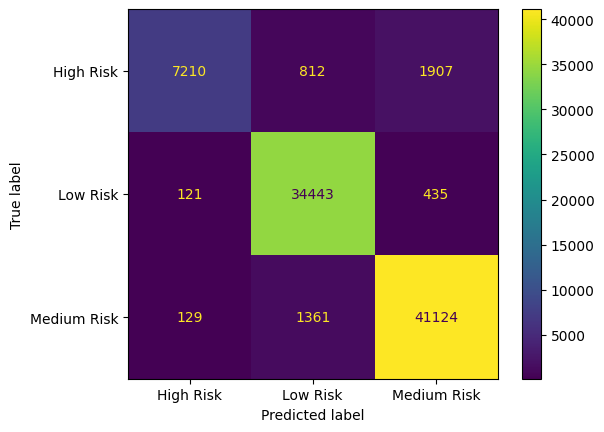

In [135]:
ConfusionMatrixDisplay.from_estimator( model_knn, x_test_knn, y_test)

## Decision Tree

In [136]:
model_dt.fit(x_train_new,y_train)

DecisionTreeClassifier(random_state=66)

In [137]:
y_train_predict_dt = model_dt.predict(x_train_new)
y_test_predict_dt = model_dt.predict(x_test_new)


In [138]:
print('------Clasification Report Decision Tree Train-------')
print(classification_report(y_train,y_train_predict_dt))

print('')
print('------Clasification Report Decision Tree Test-------')
print(classification_report(y_test,y_test_predict_dt))


------Clasification Report Decision Tree Train-------
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00     39716
    Low Risk       1.00      1.00      1.00    139994
 Medium Risk       1.00      1.00      1.00    170457

    accuracy                           1.00    350167
   macro avg       1.00      1.00      1.00    350167
weighted avg       1.00      1.00      1.00    350167


------Clasification Report Decision Tree Test-------
              precision    recall  f1-score   support

   High Risk       0.84      0.85      0.85      9929
    Low Risk       1.00      0.99      1.00     34999
 Medium Risk       0.97      0.97      0.97     42614

    accuracy                           0.96     87542
   macro avg       0.93      0.94      0.94     87542
weighted avg       0.96      0.96      0.96     87542



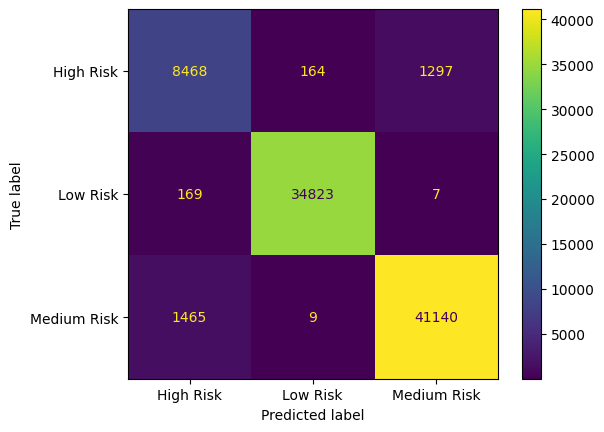

In [139]:
ConfusionMatrixDisplay.from_estimator( model_dt, x_test_new, y_test)

## Random Forest

In [140]:
model_rf.fit(x_train_new,y_train)

RandomForestClassifier(random_state=66)

In [141]:
y_train_predict_rf = model_rf.predict(x_train_new)
y_test_predict_rf = model_rf.predict(x_test_new)


In [142]:
print('------Clasification Report Random Forest Train-------')
print(classification_report(y_train,y_train_predict_rf))

print('')
print('------Clasification Report Random Forest Test-------')
print(classification_report(y_test,y_test_predict_rf))


------Clasification Report Random Forest Train-------
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00     39716
    Low Risk       1.00      1.00      1.00    139994
 Medium Risk       1.00      1.00      1.00    170457

    accuracy                           1.00    350167
   macro avg       1.00      1.00      1.00    350167
weighted avg       1.00      1.00      1.00    350167


------Clasification Report Random Forest Test-------
              precision    recall  f1-score   support

   High Risk       0.99      0.83      0.90      9929
    Low Risk       0.99      1.00      1.00     34999
 Medium Risk       0.97      1.00      0.98     42614

    accuracy                           0.98     87542
   macro avg       0.98      0.94      0.96     87542
weighted avg       0.98      0.98      0.98     87542



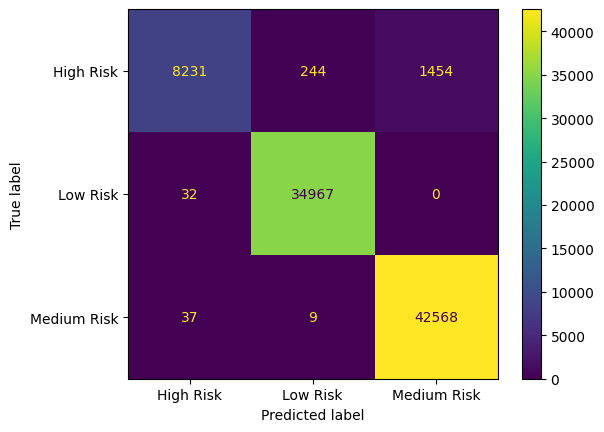

In [143]:
ConfusionMatrixDisplay.from_estimator( model_rf, x_test_new, y_test)

## Ada Boost

In [144]:
model_ada_boost.fit(x_train_new,y_train)

AdaBoostClassifier(random_state=66)

In [145]:
y_train_predict_ada_boost = model_ada_boost.predict(x_train_new)
y_test_predict_ada_boost = model_ada_boost.predict(x_test_new)


In [146]:
print('------Clasification Report Ada Boost Train-------')
print(classification_report(y_train,y_train_predict_ada_boost))

print('')
print('------Clasification Report Ada Boost Test-------')
print(classification_report(y_test,y_test_predict_ada_boost))


------Clasification Report Ada Boost Train-------
              precision    recall  f1-score   support

   High Risk       0.23      0.83      0.36     39716
    Low Risk       0.96      0.99      0.98    139994
 Medium Risk       0.98      0.35      0.52    170457

    accuracy                           0.66    350167
   macro avg       0.72      0.73      0.62    350167
weighted avg       0.89      0.66      0.68    350167


------Clasification Report Ada Boost Test-------
              precision    recall  f1-score   support

   High Risk       0.23      0.83      0.36      9929
    Low Risk       0.96      0.99      0.98     34999
 Medium Risk       0.98      0.35      0.52     42614

    accuracy                           0.66     87542
   macro avg       0.72      0.73      0.62     87542
weighted avg       0.89      0.66      0.68     87542



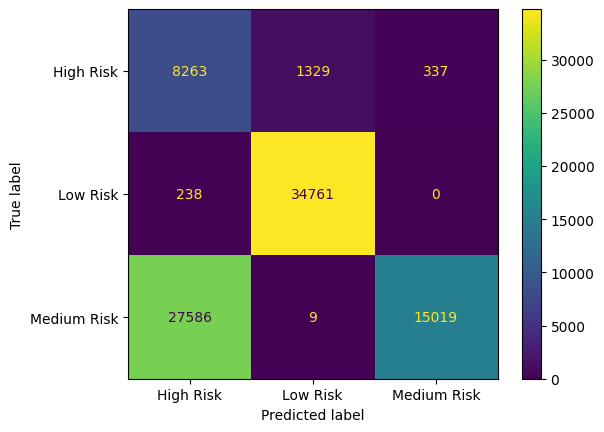

In [147]:
ConfusionMatrixDisplay.from_estimator( model_ada_boost, x_test_new, y_test)

# Cross Validation

In [148]:
def cross_val (model):

    accuracy_train_cross_val = cross_val_score(model,
                                        x_train_new,
                                        y_train,
                                        cv=5,
                                        scoring="accuracy")

    print('----Cross Validation',model,'---- ')
    print('accuracy Score - All - Cross Validation  : ', accuracy_train_cross_val)
    print('accuracy Score - Mean - Cross Validation : ', accuracy_train_cross_val.mean())
    print('accuracy Score - Std - Cross Validation  : ', accuracy_train_cross_val.std())
    print('accuracy Score - Range of Test-Set       : ', (accuracy_train_cross_val.mean()-accuracy_train_cross_val.std()) , '-', (accuracy_train_cross_val.mean()+accuracy_train_cross_val.std()))

In [149]:
accuracy_train_cross_val_knn = cross_val_score(model_knn,
                                        x_train_knn,
                                        y_train,
                                        cv=5,
                                        scoring="accuracy")

print('----Cross Validation KNN ---- ')
print('accuracy Score - All - Cross Validation  : ', accuracy_train_cross_val_knn)
print('accuracy Score - Mean - Cross Validation : ', accuracy_train_cross_val_knn.mean())
print('accuracy Score - Std - Cross Validation  : ', accuracy_train_cross_val_knn.std())
print('accuracy Score - Range of Test-Set       : ', (accuracy_train_cross_val_knn.mean()-accuracy_train_cross_val_knn.std()) , '-', (accuracy_train_cross_val_knn.mean()+accuracy_train_cross_val_knn.std()))

----Cross Validation KNN ---- 
accuracy Score - All - Cross Validation  :  [0.9436845  0.94289916 0.94412634 0.94331244 0.94401211]
accuracy Score - Mean - Cross Validation :  0.9436069093608459
accuracy Score - Std - Cross Validation  :  0.00045335028952618546
accuracy Score - Range of Test-Set       :  0.9431535590713197 - 0.9440602596503721


In [150]:
cross_val(model_dt)

----Cross Validation DecisionTreeClassifier(random_state=66) ---- 
accuracy Score - All - Cross Validation  :  [0.96458863 0.96463146 0.96435966 0.96367427 0.96271758]
accuracy Score - Mean - Cross Validation :  0.9639943191921148
accuracy Score - Std - Cross Validation  :  0.000724587753601538
accuracy Score - Range of Test-Set       :  0.9632697314385132 - 0.9647189069457163


In [151]:
cross_val(model_rf)

----Cross Validation RandomForestClassifier(random_state=66) ---- 
accuracy Score - All - Cross Validation  :  [0.97958135 0.98036668 0.97969529 0.98025217 0.97925264]
accuracy Score - Mean - Cross Validation :  0.9798296233260742
accuracy Score - Std - Cross Validation  :  0.00041942145569230535
accuracy Score - Range of Test-Set       :  0.9794102018703819 - 0.9802490447817664


In [152]:
cross_val(model_ada_boost)

----Cross Validation AdaBoostClassifier(random_state=66) ---- 
accuracy Score - All - Cross Validation  :  [0.87163378 0.575292   0.64048377 0.87167478 0.83800494]
accuracy Score - Mean - Cross Validation :  0.75941785465201
accuracy Score - Std - Cross Validation  :  0.12602984345705706
accuracy Score - Range of Test-Set       :  0.6333880111949529 - 0.885447698109067


# Hyperparameter Tuning 

In [153]:
param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [154]:
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)


In [155]:
random_search.fit(x_train_new, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=66),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [156]:
print("Parameter Terbaik:", random_search.best_params_)

Parameter Terbaik: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [157]:
best_model = random_search.best_estimator_
accuracy = best_model.score(x_test_new, y_test)
print(f"Akurasi Model Terbaik: {accuracy:.2f}")

Akurasi Model Terbaik: 0.98


In [158]:
y_train_predict_best_rf = best_model.predict(x_train_new)
y_test_predict_best_rf = best_model.predict(x_test_new)


In [164]:
print('------Clasification Report Random Forest Best Train-------')
print(classification_report(y_train,y_train_predict_best_rf))

print('')
print('------Clasification Report Random Forest Best Test-------')
print(classification_report(y_test,y_test_predict_best_rf))


------Clasification Report Random Forest Best Train-------
              precision    recall  f1-score   support

   High Risk       1.00      0.94      0.97     39716
    Low Risk       1.00      1.00      1.00    139994
 Medium Risk       0.99      1.00      0.99    170457

    accuracy                           0.99    350167
   macro avg       1.00      0.98      0.99    350167
weighted avg       0.99      0.99      0.99    350167


------Clasification Report Random Forest Best Test-------
              precision    recall  f1-score   support

   High Risk       0.99      0.83      0.90      9929
    Low Risk       0.99      1.00      1.00     34999
 Medium Risk       0.97      1.00      0.98     42614

    accuracy                           0.98     87542
   macro avg       0.98      0.94      0.96     87542
weighted avg       0.98      0.98      0.98     87542



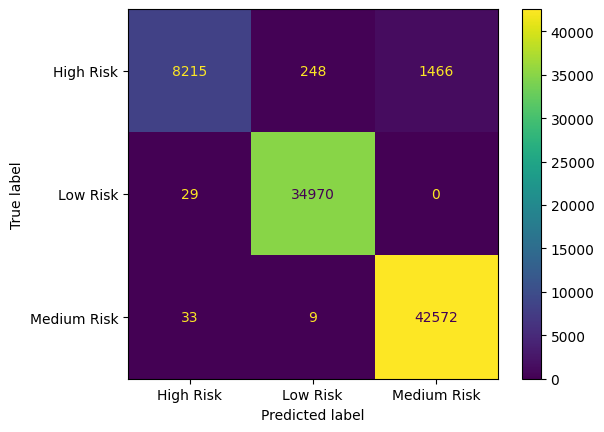

In [163]:
ConfusionMatrixDisplay.from_estimator( best_model, x_test_new, y_test)

# Model Final

In [161]:
#membuat table baru default untuk nantinya membandingkan dengan nilai f1 score test yang default dan yang sudah dengan menggunakan random seach
all_reports_rf = {}
def performance_report(all_reports_rf, y_train, y_train_predict_rf, y_test, y_test_predict_rf, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_train_predict_rf,average='micro'),
      'train - recall' : recall_score(y_train, y_train_predict_rf,average='micro'),
      'train - accuracy' : accuracy_score(y_train, y_train_predict_rf),
      'train - f1_score' : f1_score(y_train, y_train_predict_rf,average='micro'),
      'test - precision' : precision_score(y_test, y_test_predict_rf,average='micro'),
      'test - recall' : recall_score(y_test, y_test_predict_rf,average='micro'),
      'test - accuracy_score' : accuracy_score(y_test, y_test_predict_rf),
      'test - f1_score' : f1_score(y_test, y_test_predict_rf,average='micro'),
  }
  all_reports_rf[name] = score_reports
  return all_reports_rf

all_reports_rf = performance_report(all_reports_rf, y_train, y_train_predict_rf, y_test, y_test_predict_rf, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports_rf)

all_reports_rf = performance_report(all_reports_rf, y_train, y_train_predict_best_rf, y_test, y_test_predict_best_rf, 'After HyperParameter Tuning')
pd.DataFrame(all_reports_rf)

,Baseline (Default Hyperparameter),After HyperParameter Tuning
train - precision,0.999997,0.99366
train - recall,0.999997,0.99366
train - accuracy,0.999997,0.99366
train - f1_score,0.999997,0.99366
test - precision,0.979713,0.97961
test - recall,0.979713,0.97961
test - accuracy_score,0.979713,0.97961
test - f1_score,0.979713,0.97961


Based on hyperparamter tuning test on RandomForest Classifier, the best model that we can use is baseline model (default model/before hyperparameter tuning).

# Model Saving 

In [165]:
with open('pipeline_preprocessing.pkl', 'wb') as file_1:
  pickle.dump(prep, file_1)

with open('model_rf_best.pkl', 'wb') as file_2:
  pickle.dump(best_model, file_2)

with open('list_num_columns.txt', 'w') as file_3:
  file_3.write(str(correlation_num))

with open('list_cat_columns_ordinal.txt', 'w') as file_4:
  file_4.write(str(correlation_cat_ordinal))

with open('list_cat_columns_non_ordinal.txt', 'w') as file_5:
  file_5.write(str(correlation_cat_non_ordinal))


